# Link github:

https://github.com/npqd/P4DS_FinalProject.git

---

# Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

---

# Thu thập dữ liệu

### Mô tả cơ bản về dữ liệu

- Dữ liệu của hơn 40,000 trận đấu bóng đá quốc tế từ 1872-2019
- Tên các quốc gia theo lục địa
- Tên khác/ cũ của các quốc gia 

### Mục đích chọn dữ liệu

- Bóng đá trước giờ vẫn luôn là môn thể thao vua và luôn được mọi người quan tâm nhiều nhất. Qua dữ liệu đã có, ta có thể biết được tình hình phát triển bóng đá của các quốc gia, sự thay đổi về vị thế bóng đá của các nước qua các năm. Ngoài ra thông qua lịch sử đối đầu, chúng ta có thể dự đoán được phần nào các kết quả trong tương lai
- Data tên quốc gia theo lục địa để so sánh các quốc gia trong cùng khu vực bóng đá
- Data các tên gọi của quốc gia để quy ước tên các quốc gia trong dữ liệu là tên hiện tại của quốc gia đó

### Mô tả chi tiết dữ liệu

- `result.csv` Dữ liệu chứa 42,899 kết quả của các trận đá bóng quốc tế từ năm 1872 đến 2021. Từ những giải đấu được tổ chức bởi FIFA World Cup đến những giải đấu châu lục cho đến cả những giải đấu giao hữu. Đây là dữ liệu của những trận bóng đá nam, không bao gồm những giải đấu như Olympic hoặc của những đội hình phụ hoặc U23... hoặc là các giải đấu trong nước (chỉ tính ở cấp đội tuyển quốc gia)
- `country_continent` Phân nhóm các quốc gia theo tên các châu lục, các vùng của một châu lục
- `country_allname` [wiki_name](https://en.wikipedia.org/wiki/List_of_alternative_country_names) các tên gọi thay thế, hoặc tên gọi trong quá khứ của từng quốc gia

#### `result.csv`

- `date` - ngày diễn ra trận đấu
- `home_team` - tên của đội chủ nhà
- `away_team` - tên của đội khách
- `home_score` - số bàn thắng đội chủ nhà ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ, không tính loạt luân lưu
- `away_score` - số bàn thắng đội khách ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ, không tính loạt luân lưu
- `tournament` - tên của giải đấu
- `city` - tên của thành phố trận đấu diễn ra
- `country` - tên của quốc gia mà trận đấu diễn ra
- `neutral` - cột TRUE/FALSE , nếu được tỏ trức ở một sân trung lập thì trả về giá trị TRUE

* **Lưu ý:**
    - `home_team` và `away_team` là tên của đội và lúc diễn ra trận bóng. Ví dụ năm 1882, tên đội `Ireland` đá với `England` thì trong data này sẽ được gọi là `Northern Ireland` bởi vì đây là tên hiện tại của đội tuyển `Ireland` năm 1882. Việc quy ước này để có thể dễ dàng lấy thống kê
    - `country` sẽ là tên của quốc gia lúc diễn ra trận đấu. Vào những năm 1950, `Ghana` tuy đá ở `Gold Coast` nhưng vẫn là đội chủ nhà do cột `neutral` trả về giá trị FALSE


#### `country_continent.csv`

-   `Country or Area` : Tên quốc gia, lãnh thổ
-   `ISO-alpha3 Code`: Mã ISO-alpha3 của quốc gia
-   `M49 Code`: Mã M49 của quốc gia
-   `Region 1`: Tên khu vực 1
-   `Region 2`: Tên khu vực 2
-   `Continent`: Tên lục địa

- Lưu ý:  Độ rộng `Continent` > `Region 2` > `Region 1`

#### `country_allname.csv`

### Nguồn thu thập dữ liệu

[result](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017)

[country_continent](https://en.wikipedia.org/wiki/Geography_of_association_football)


---

# Khám phá dữ liệu

### Đọc dữ liệu

Đọc dữ liệu các trận đấu vào `df_match`

In [2]:
df_match  = pd.read_csv('results.csv')
df_match.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
42507,2021-07-08,South Africa,Eswatini,1,0,COSAFA Cup,Port Elizabeth,South Africa,False
12687,1983-04-27,Northern Ireland,Albania,1,0,UEFA Euro qualification,Belfast,Northern Ireland,False
8284,1972-06-18,Peru,Venezuela,1,0,Brazil Independence Cup,Manaus,Brazil,True
34613,2012-09-27,Dominican Republic,Dominica,2,1,CFU Caribbean Cup qualification,Bridgetown,Barbados,True
27734,2005-06-18,Senegal,Togo,2,2,FIFA World Cup qualification,Dakar,Senegal,False


### Dữ liệu có bao nhiêu dòng và cột ?

In [3]:
df_continent = pd.read_csv('country_continent.csv')
df_continent = df_continent.set_index(df_continent.columns[0])
#TEST
df_continent.sample(5)

,Code,Country,Continent
Index,,,
20,BLZ,Belize,"North America, Central America and the Caribbean"
161,SAM,Samoa,Oceania
101,KVX,Kosovo,Europe
184,SYR,Syria,Asia
115,MWI,Malawi,Africa


### Tiền xử lý

- Để chắc chắn rằng, những quốc gia chúng ta đang tìm hiểu là những quốc gia hiện tại được công nhận bởi FIFA, vì vậy ta sẽ chỉ giữ những dữ liệu của những trận đấu mà và `home_team` và `away_team` đều là đội bóng có tên trong danh sách FIFA bây giờ.
- Ta phải làm vậy vì giờ bóng đá quốc tế được sắp xếp theo bảng xếp hạng của FIFA, nên nếu không có tên trong FIFA thì các trận đấu gần như chẳng được tính điểm

In [4]:
df_match= df_match[df_match['home_team'].isin(df_continent['Country']) & \
     df_match['away_team'].isin(df_continent['Country'])]
df_match.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
30292,2008-05-28,Iceland,Wales,0,1,Friendly,Reykjavík,Iceland,False
10039,1976-11-28,Romania,Bulgaria,3,2,Balkan Cup,Bucharest,Romania,False
36516,2014-10-11,Uganda,Togo,0,1,African Cup of Nations qualification,Kampala,Uganda,False
7559,1970-07-30,India,Taiwan,0,1,Merdeka Tournament,Kuala Lumpur,Malaysia,True
29440,2007-06-27,Brazil,Mexico,0,2,Copa América,Puerto Ordaz,Venezuela,True


- Theo như mô tả về dữ liệu ở trên và quan sát thì một dòng cho biết thông tin về một trận đấu ở cấp đội tuyển quốc gia giữa hai nước. Có vẻ không có dòng nào bị "lạc loài"

Tiếp theo, ta tính số dòng và số cột của DataFrame `df_match` và `df_continent`, lưu vào biến `match_rows`,`match_cols` và `continent_rows`,`continent_cols`.

In [5]:
match_rows,match_cols = df_match.shape
print('number rows of match: ',match_rows)
print('number cols of match: ',match_cols)

number rows of match:  39479
number cols of match:  9


In [6]:
continent_rows,continent_cols = df_continent.shape
print('number rows of continent: ',continent_rows)
print('number cols of continent: ',continent_cols)

number rows of continent:  211
number cols of continent:  3


### Mỗi dòng có ý nghĩa gì? Có vấn đề gì các dòng có ý nghĩa khác nhau không ?

In [7]:
df_match.dtypes

date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral        object
dtype: object

- Các cột `"date, home_team, away_team, tournament, city, country, neutral"` đang có kiểu dữ liệu là `object`.
- Thường thì kiểu `object` thường ám chỉ kiểu dữ liệu `chuỗi`.

### Với mỗi cột dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ta sẽ tính một số thông tin sau:

- Số lượng các giá trị thiếu.
- Tỉ lệ % các giá trị thiếu (0->100).
- Giá trị min.
- Giá trị median.
- Giá trị max.

In [8]:
def calculate_quartile(data):
    nume_col_info_df = pd.DataFrame()
    for col in data.keys():
        if data[col].dtype in [np.int64, np.float64] :
            missing = data[col].isnull().sum()
            missing_percentage = round(data[col].isnull().sum() * 100 / len(data[col]),2)
            min_value = data[col].min()         
            median = data[col].median() 
            max_value = data[col].max()
            row_line = pd.Series([missing,missing_percentage, min_value,  median, max_value], 
                                 index = ['num_missing','missing_percentage', 'min',  'median', 'max'])
            nume_col_info_df[col] = row_line
    return nume_col_info_df

In [9]:
info_df = calculate_quartile(df_match)
info_df

,home_score,away_score
num_missing,3.00,3.00
missing_percentage,0.01,0.01
min,0.00,0.00
median,1.00,1.00
max,31.00,21.00


- Từ bảng trên, ta có thể `max` của `home_score` và `away_score` là **31** và **21** , có lẽ đây là những trận đấu vô cùng cởi mở từ các đội hoặc là những trận đấu một chiều, trình độ chênh lệch giữ hai đội quá lớn.
- Không có gì bất thường.

### Với các cột dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ta sẽ tính một số thông tin sau:

- Số lượng các giá trị thiếu.
- Tỉ lệ % các giá trị thiếu (0->100).
- Số lượng các giá trị các nhau (không xét giá trị thiếu).
- TỈ lệ % (0->100) của mỗi giá trị của cột được sắp xếp theo tỉ lệ % giảm dần (không xét giá trị thiếu).

In [10]:
cate_col = ['home_team','away_team','tournament','city','country','neutral']

missing = []
missing_percentage=[]
num_values=[]
value_percentages=[]

for column in cate_col:
    missing.append(df_match[column].isnull().sum())
    missing_percentage.append((df_match[column].isnull().sum() * 100 / len(df_match)).round(3))
    temp = df_match[column].dropna()
    num_values.append(len(temp.unique()))
    value_percentages.append(((temp.value_counts(normalize=True)*100).round(1)).to_dict())
cate_col_info_df = pd.DataFrame([missing,missing_percentage,num_values,value_percentages],
                            index=['num_missing','missing_percentage','num_values','value_percentages'],
                            columns=cate_col)
cate_col_info_df

,home_team,away_team,tournament,city,country,neutral
num_missing,0,0,0,0,0,0
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0
num_values,209,209,117,1885,248,2
value_percentages,"{'Brazil': 1.4, 'Argentina': 1.4, 'Mexico': 1....","{'Uruguay': 1.4, 'Sweden': 1.3, 'England': 1.3...","{'Friendly': 40.0, 'FIFA World Cup qualificati...","{'Kuala Lumpur': 1.5, 'Doha': 1.2, 'Bangkok': ...","{'United States': 3.0, 'France': 1.8, 'Malaysi...","{False: 76.5, True: 23.5}"


### **2 file country_continent.csv và country-names-cross-ref đã được mô tả ở trên và chỉ là file hỗ trợ việc tra cứu tên các nước (ở trong quá khứ và hiện tại) trong file result nên ta chỉ đọc hai file này lên để xem**

In [11]:
country_name_cross_ref_df = pd.read_csv('country_continent.csv')
country_name_cross_ref_df.head()

,Index,Code,Country,Continent
0,0,AFG,Afghanistan,Asia
1,1,ALB,Albania,Europe
2,2,ALG,Algeria,Africa
3,3,ASA,American Samoa,Oceania
4,4,AND,Andorra,Europe


In [21]:
df_match[df_match['tournament'] == 'FIFA World Cup']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1314,1930-07-13,Belgium,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,True
1315,1930-07-13,France,Mexico,4.0,1.0,FIFA World Cup,Montevideo,Uruguay,True
1316,1930-07-14,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup,Montevideo,Uruguay,True
1317,1930-07-14,Peru,Romania,1.0,3.0,FIFA World Cup,Montevideo,Uruguay,True
1318,1930-07-15,Argentina,France,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
40081,2018-07-07,Russia,Croatia,2.0,2.0,FIFA World Cup,Sochi,Russia,False
40082,2018-07-10,France,Belgium,1.0,0.0,FIFA World Cup,St. Petersburg,Russia,True
40083,2018-07-11,Croatia,England,2.0,1.0,FIFA World Cup,Moscow,Russia,True
40084,2018-07-14,Belgium,England,2.0,0.0,FIFA World Cup,St. Petersburg,Russia,True


`df_match`

- Mỗi dòng cho biết thông tin về trận đấu bóng đá giữa 2 nước, thông qua quan sát sơ bộ thì có vẻ không có vấn đề gì, mỗi dòng khác nhau thể hiện thông tin khác nhau về mỗi trận đấu.

`df_continent`

Mỗi dòng cho biết thông tin về tên, mã code và khu vực của từng quốc gia theo FIFA, có vẻ như không có vấn đề gì

### Dữ liệu có các dòng bị lặp không ? 

In [12]:
np.all([df_match.duplicated(keep=False)])

False

- Có vẻ như không có dòng dữ liệu nào bị lặp lại thông tin cả.

### Mỗi cột có ý nghĩa gì?

- Như đã mô tả ở phần Mô tả chi tiết dữ liệu, ta đã hiểu rõ về ý nghĩa của các cột
- Để tránh trường hợp bạn quên thì ta sẽ đọc lại thông tin của các cột thông qua 2 file text, `mean_result.csv` và `mean_continent.csv`

Thông tin `df_match`

In [13]:
match_cols_meaning = pd.read_csv('mean_result.csv')
pd.set_option('display.max_colwidth',None)
match_cols_meaning

,column_name,mean
0,date,ngày diễn ra trận đấu
1,home_team,tên của đội chủ nhà
2,away_team,tên của đội khách
3,home_score,số bàn thắng đội chủ nhà ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ - không tính loạt luân lưu
4,away_score,số bàn thắng đội khách ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ - không tính loạt luân lưu
5,tournament,tên của giải đấu
6,city,tên của thành phố trận đấu diễn ra
7,country,tên của quốc gia mà trận đấu diễn ra
8,neutral,cột TRUE/FALSE nếu được tỏ trức ở một sân trung lập thì trả về giá trị TRUE


Thông tin `df_continent`

In [14]:
continent_cols_meaning = pd.read_csv('mean_continent.csv')
pd.set_option('display.max_colwidth',None)
continent_cols_meaning

,column_name,mean
0,Country,Tên quốc gia - lãnh thổ theo FIFA
1,Code,Mã của quốc gia theo FIFA
2,Continent,Tên lục địa


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cần phải thay đổi hay không?

- Thông tin kiểu dữ liệu `df_match`

In [15]:
df_match.dtypes

date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral        object
dtype: object

có 3 cột thể hiện dữ liệu numneric là `date` `home_score` và `away_score`. Nhưng ở đây `date` vẫn thể hiện kiểu dữ liệu là `object`, có vẻ như ta sẽ thay đổi kiểu dữ liệu cột `date` về dạng `datetime`

In [16]:
df_match['date'] = pd.to_datetime(df_match['date'], format="%Y-%m-%d")
df_match.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score           float64
away_score           float64
tournament            object
city                  object
country               object
neutral               object
dtype: object

- Có vẻ dữ liệu cột `date` không có vấn đề gì cả, vì khi chuyển qua datetime chương trình không báo lỗi

- Thông tin kiểu dữ liệu `df_continent`

In [17]:
df_continent.dtypes

Code         object
Country      object
Continent    object
dtype: object

Vì dữ liệu của `df_continent` được biểu diễn hoàn toàn dưới dạng chuỗi nên có vẻ không có gì cần phải thay đổi

### Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

#### Trước khi tìm hiểu kĩ về các dữ liệu dạng số, có giá trị nào không hợp lệ trong mỗi cột không?

1. Trước tiên ta kiểm tra cột `date`. Trong đó ta phải chắc chắn rằng không có trận đấu nào chưa được đá mà đã có kết quả, tức là thời gian lớn hơn thời điểm hiện tai mà có kết quả


In [18]:
np.all(df_match['date'] > np.datetime64(dt.date.today()))

False

- Vậy là không có dữ liệu nào của cột `date` có dấu hiệu bất thường

2. Tiếp theo kiểm tra 2 cột `home_score` và `away_score` coi có giá trị nào bị âm không?

In [19]:
len(df_match[(df_match['home_score'] < 0) | (df_match['away_score'] < 0) ])

0

- Vậy là dữ liệu 2 cột `home_socre` và `away_score` không có giá trị nào bị âm

#### Quay lại bước khám phá dữ liệu

Ta sẽ tính một số thông tin sau của các cột dữ liệu dạng số:

- Số lượng các giá trị thiếu.
- Tỉ lệ % các giá trị thiếu (0->100).
- Giá trị min.
- Giá trị median.
- Giá trị max.

In [20]:

nume_col_info_df = pd.DataFrame()
for col in df_match.keys():
    if df_match[col].dtype in [np.int64, np.float64,'<M8[ns]'] :
        missing = df_match[col].isnull().sum()
        missing_percentage = round(df_match[col].isnull().sum() * 100 / len(df_match[col]),2)
        min_value = df_match[col].min()         
        median = df_match[col].median() 
        max_value = df_match[col].max()
        row_line = pd.Series([missing,missing_percentage, min_value,  median, max_value], 
                                index = ['num_missing','missing_percentage', 'min',  'median', 'max'])
        nume_col_info_df[col] = row_line
nume_col_info_df    

,date,home_score,away_score
num_missing,0,3.00,3.00
missing_percentage,0.0,0.01,0.01
min,1872-11-30 00:00:00,0.00,0.00
median,1999-04-28 00:00:00,1.00,1.00
max,2021-12-18 00:00:00,31.00,21.00


Mô hình hóa phân bố các giá trị số

Text(0.5, 1.0, 'number score away')

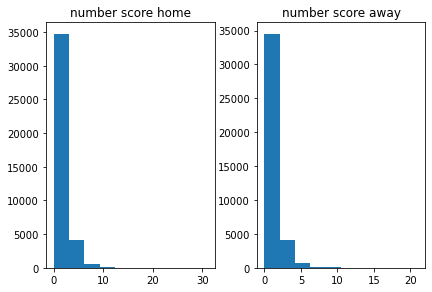

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout()
ax1.hist(df_match.home_score);
ax1.set_title('number score home')
ax2.hist(df_match.away_score);
ax2.set_title('number score away')

In [22]:
df_match[['home_score','away_score']]

,home_score,away_score
0,0.0,0.0
1,4.0,2.0
2,2.0,1.0
3,2.0,2.0
4,3.0,0.0
...,...,...
43079,2.0,2.0
43080,0.0,1.0
43081,NaN,NaN
43082,NaN,NaN


In [23]:
# f = plt.figure(figsize=(8, 10))
# plt.matshow(df_match[['home_score','away_score']].corr(),fignum=f.number)
# plt.xticks(range(df_match.select_dtypes(['number']).shape[1]), df_match.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df_match.select_dtypes(['number']).shape[1]), df_match.select_dtypes(['number']).columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);


- Từ bảng trên, ta có thể max của `home_score` và `away_score` là 31 và 21 , có lẽ đây là những trận đấu vô cùng cởi mở từ các đội hoặc là những trận đấu một chiều, trình độ chênh lệch giữ hai đội quá lớn. min là 0.
- Nhìn vào đồ thị, ta hiểu được tại sao mean lại là 1
- Tương tự với `date` như đã tiền xử lý ở trên

     => Không có gì bất thường.

### Với các cột dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ta sẽ tính một số thông tin sau:

- Số lượng các giá trị thiếu.
- Tỉ lệ % các giá trị thiếu (0->100).
- Số lượng các giá trị các nhau (không xét giá trị thiếu).
- TỈ lệ % (0->100) của mỗi giá trị của cột được sắp xếp theo tỉ lệ % giảm dần (không xét giá trị thiếu).

In [23]:
#set colwidth whit row have too much info
pd.set_option('display.max_colwidth',100)

cate_col = ['home_team','away_team','tournament','city','country','neutral']

missing = []
missing_percentage=[]
num_values=[]
value_percentages=[]

for column in cate_col:
    missing.append(df_match[column].isnull().sum())
    missing_percentage.append((df_match[column].isnull().sum() * 100 / len(df_match)).round(3))
    temp = df_match[column].dropna()
    num_values.append(len(temp.unique()))
    value_percentages.append(((temp.value_counts(normalize=True)*100).round(1)).to_dict())
cate_col_info_df = pd.DataFrame([missing,missing_percentage,num_values,value_percentages],
                            index=['num_missing','missing_percentage','num_values','value_percentages'],
                            columns=cate_col)

cate_col_info_df


,home_team,away_team,tournament,city,country,neutral
num_missing,0,0,0,0,0,0
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0
num_values,209,209,117,1885,248,2
value_percentages,"{'Brazil': 1.4, 'Argentina': 1.4, 'Mexico': 1.3, 'England': 1.3, 'Germany': 1.3, 'Sweden': 1.2, ...","{'Uruguay': 1.4, 'Sweden': 1.3, 'England': 1.3, 'Paraguay': 1.2, 'Hungary': 1.1, 'Argentina': 1....","{'Friendly': 40.0, 'FIFA World Cup qualification': 19.4, 'UEFA Euro qualification': 6.2, 'Africa...","{'Kuala Lumpur': 1.5, 'Doha': 1.2, 'Bangkok': 1.0, 'London': 1.0, 'Budapest': 0.9, 'Montevideo':...","{'United States': 3.0, 'France': 1.8, 'Malaysia': 1.7, 'England': 1.5, 'Germany': 1.4, 'Qatar': ...","{False: 76.5, True: 23.5}"


Mô hình hóa phân bố các dữ liệu


In [63]:
# df_match.home_score.sort_values()
# save = df_match.home_team.value_counts().head(7)
# ax = plt.bar(save.index,save.values)
# plt.xticks(rotation=90);
df_match[cate_col[6]]

IndexError: list index out of range

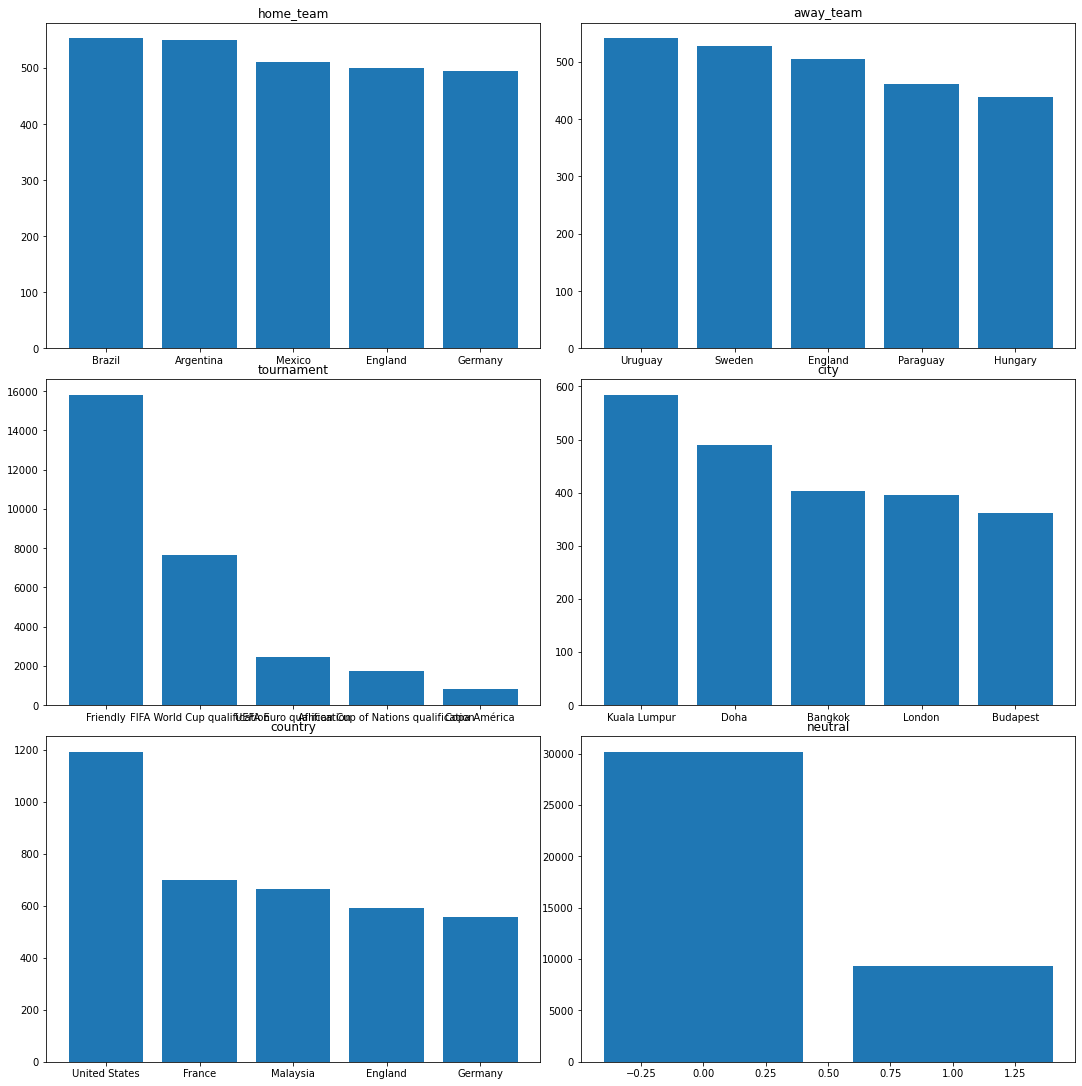

In [24]:
cate_col = ['home_team','away_team','tournament','city','country','neutral']

df_temp = df_match[cate_col]
fig, axs = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout(pad=1, w_pad=1, h_pad=1.0)
for i in range(0,3):
    for j in range(0,2):
        axs[i,j].bar(df_match[cate_col[i*2+j]].value_counts().head(5).index,\
            df_match[cate_col[i*2+j]].value_counts().head(5).values)
        axs[i,j].set_title(cate_col[i*2+j])


- Dữ liệu có vẻ không có gì bất thường, tỉ lệ các nước làm `home_team `và `away_team` khá tương đương, có sự chênh lệch này do ta đã xóa những trận đấu có chứa quốc gia không thuộc hệ thống của FIFA.
- Giao hữu là giải được tổ chức nhiều nhất trên thế giới nên nó chiếm tỉ lệ số trận cao hoàn toàn hợp lý
- Các giải đấu thường tổ chức ở một quốc gia trung lập nào nên tỉ lệ trận đấu sân trung lập nhiều hơn sân nhà là điều đương nhiên

---

# Đưa ra các câu hỏi cần trả lời

**Câu hỏi 1:** Từ kì World Cup gần nhất (2018), việc tham gia các trận giao hữu có ảnh hưởng đến đến kết quả tại World Cup của các đội hay không? Kết quả của các trận đấu giao hữu được tính trong vòng 4 năm trước khi vòng loại World Cup diễn ra. Ví dụ tại World Cup 2018 thì ta sẽ tính các trận giao hữu từ 2015 đến trước khi World Cup 2018 diễn ra.

**Trả lời câu hỏi này** ta sẽ biết được việc tham gia các trận giao hữu có ảnh hưởng đến kết quả của một kì tham dự World Cup của một đội hay không? Và ý nghĩ thực sự của việc tập luyện đá giao hữu giữa các đội.

**Câu hỏi 2:** Trong suốt chiều dài lịch sử của các kì World Cup thì liệu có đội bóng nào đã tham dự tất cả các kì World Cup hay không? Kể từ World Cup 1998 (được nâng lên 32 đội tham gia), đâu là khu vực có thành tích tốt nhất ở World Cup?

**Trả lời câu hỏi này** ta sẽ biết được đâu là đội bóng có bề dày thành tích trong các kì World Cup và đâu là khu vực, cái nôi sinh ra những cầu thủ vĩ đại.

---

# Tiền xử lí + phân tích dữ liệu để trả lời câu hỏi

## Câu hỏi 1: 
**Từ kì World Cup gần nhất (2018), việc tham gia các trận giao hữu có ảnh hưởng đến đến kết quả tại World Cup của các đội hay không?**

Đầu tiên ta sẽ lấy ra bảng kết quả của World Cup 2018 và lưu vào `df_WC_2018` và lấy ra ngày bắt đầu của World Cup 2018 lưu vào `start_day`.

In [115]:
temp = df_match[df_match['date'].dt.year == 2018]
df_WC_2018 = temp[temp['tournament'] == "FIFA World Cup"]
start_day = df_WC_2018['date'].min()
df_WC_2018

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40021,2018-06-14,Russia,Saudi Arabia,5.0,0.0,FIFA World Cup,Moscow,Russia,False
40022,2018-06-15,Egypt,Uruguay,0.0,1.0,FIFA World Cup,Ekaterinburg,Russia,True
40023,2018-06-15,Morocco,Iran,0.0,1.0,FIFA World Cup,St. Petersburg,Russia,True
40024,2018-06-15,Portugal,Spain,3.0,3.0,FIFA World Cup,Sochi,Russia,True
40025,2018-06-16,France,Australia,2.0,1.0,FIFA World Cup,Kazan,Russia,True
...,...,...,...,...,...,...,...,...,...
40081,2018-07-07,Russia,Croatia,2.0,2.0,FIFA World Cup,Sochi,Russia,False
40082,2018-07-10,France,Belgium,1.0,0.0,FIFA World Cup,St. Petersburg,Russia,True
40083,2018-07-11,Croatia,England,2.0,1.0,FIFA World Cup,Moscow,Russia,True
40084,2018-07-14,Belgium,England,2.0,0.0,FIFA World Cup,St. Petersburg,Russia,True


- Loại bỏ những cột không cần thiết như `city, country, neutral`.

In [130]:
df_WC_2018 = df_WC_2018.drop(['city','country','neutral'],axis=1)

- Tiếp theo ta sẽ lấy ra tổng số trận thi đấu của 32 đội tham dự World Cup 2018 và các đội tham dư WC2018 lưu vào `team_list`.

In [305]:
temp1 = df_WC_2018['home_team'].value_counts().to_frame()

temp2 = df_WC_2018['away_team'].value_counts().to_frame()

temp3 = pd.concat([temp1, temp2], axis=1, join='outer')

temp3['away_team'] = temp3['away_team'].fillna(0)
temp3['home_team'] = temp3['home_team'].fillna(0)
temp3['total match'] = temp3['away_team'] +temp3['home_team']

temp3 = temp3.sort_values(by=['total match'],ascending=False)
team_list = temp3.index.to_list()
temp3

,home_team,away_team,total match
France,5,2.0,7.0
Croatia,3,4.0,7.0
England,2,5.0,7.0
Belgium,4,3.0,7.0
Brazil,4,1.0,5.0
Sweden,3,2.0,5.0
Uruguay,3,2.0,5.0
Russia,5,0.0,5.0
Denmark,2,2.0,4.0
Mexico,1,3.0,4.0


Vì World Cup 2018 được tổ chức ở Nga vì thế số trận làm đội khách của Nga là **0**.

Theo thể thức thi đấu của một kì World Cup ([ta có thể xem tại đây](https://vi.wikipedia.org/wiki/Gi%E1%BA%A3i_v%C3%B4_%C4%91%E1%BB%8Bch_b%C3%B3ng_%C4%91%C3%A1_th%E1%BA%BF_gi%E1%BB%9Bi#Th%E1%BB%83_th%E1%BB%A9c))
- Những đội không vượt qua vòng bảng sẽ thi đấu **3** trận.
- Những đội vượt qua vòng bảng sẽ thi đấu ít nhất **4** trận.
- Những đội vượt qua vòng 1/16 sẽ thi đấu ít nhất **5** trận.
- Những đội vượt qua vòng tứ kết sẽ thi đấu ít nhất **6** trận.
- Những đội vượt qua vòng bán kết sẽ thi đấu **7** trận.

Ta sẽ lấy ra những đội có thành tích tốt ở WC2018 (tức là đã vượt qua vòng bảng,vòng 16 đôi, vòng tứ kết) và lần lượt lưu vào ``` team_16_list```, ` team_8_list`, ` team_4_list`.

In [306]:
df_16_WC18 = temp3[temp3['total match'] >=4 ]
team_16_list = df_16_WC18.index.to_list()

df_8_WC18 = temp3[temp3['total match'] >=5]
team_8_list = df_8_WC18.index.to_list()

df_4_WC18 = temp3[temp3['total match'] >=7]
team_4_list = df_4_WC18.index.to_list()


- Lấy ra kết quả các trận giao hữu của 32 đội trong khoãng thời gian từ `2015` đến `2018` và lưu vào `df_friendly_match`.

In [307]:
temp4 = df_match.loc[((df_match['date'].dt.year == 2018) | (df_match['date'].dt.year == 2017)
                         | (df_match['date'].dt.year == 2016) | (df_match['date'].dt.year == 2015)) & (df_match['tournament'] == "Friendly") 
                         & (df_match['date'] < start_day)]
df_friendly_match = temp4.loc[(temp4['home_team'].isin(team_list)) | temp4['away_team'].isin(team_list) ]
df_friendly_match

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
36764,2015-01-04,Iran,Iraq,1.0,0.0,Friendly,Wollongong,Australia,True
36765,2015-01-04,South Korea,Saudi Arabia,2.0,0.0,Friendly,Parramatta,Australia,True
36770,2015-01-09,Senegal,Gabon,1.0,0.0,Friendly,Casablanca,Morocco,True
36778,2015-01-11,Nigeria,Ivory Coast,0.0,1.0,Friendly,Abu Dhabi,United Arab Emirates,True
36779,2015-01-11,Tunisia,Algeria,1.0,1.0,Friendly,Radès,Tunisia,False
...,...,...,...,...,...,...,...,...,...
40015,2018-06-10,Austria,Brazil,0.0,3.0,Friendly,Vienna,Austria,False
40017,2018-06-11,South Korea,Senegal,0.0,2.0,Friendly,Grödig,Austria,True
40018,2018-06-11,Belgium,Costa Rica,4.0,1.0,Friendly,Brussels,Belgium,False
40019,2018-06-12,Japan,Paraguay,4.0,2.0,Friendly,Innsbruck,Austria,True


- Kết quả số trận thắng, thua, hòa trong các trận giao hữu của 16 đội sẽ được lưu vào `df_total_result`.

In [134]:
df_total_result = pd.DataFrame(columns=['Team','Win', 'Lose', 'Tie'])

- Tạo hàm `getTotalResultofTeam` để lấy ra kết quả tổng số trận thắng, thua, hòa trong số trận giao hữu của một đội và lưu vào một `dict`.

In [135]:
def getTotalResultofTeam(name,df_friendly_match):
    total_result = {'Team':name,
                'Win': 0,
                'Lose': 0,
                'Tie': 0}
    df_team_home = df_friendly_match.loc[(df_friendly_match['home_team'] ==name)][["date","home_team","away_team","home_score","away_score"]]
    df_team_home["goal difference"] = df_team_home["home_score"] - df_team_home["away_score"]
    tempp1 =  df_team_home["goal difference"] 

    df_team_away = df_friendly_match.loc[(df_friendly_match['away_team'] ==name)][["date","home_team","away_team","home_score","away_score"]]
    df_team_away["goal difference"] = df_team_away["away_score"] - df_team_away["home_score"]
    tempp2 =  df_team_away["goal difference"] 

    result = np.append(df_team_home["goal difference"].values,df_team_away["goal difference"].values)
    result
    for i in result:
        if i>0:
            total_result["Win"]+=1
        elif i == 0:
            total_result["Tie"]+=1
        elif i <0:
            total_result["Lose"]+=1
    return total_result

- Hàm `get_df_total_result` để thực hiện việc lưu kết quả giao hữu của 32 đội vào `df_total_result`.

In [136]:
def get_df_total_result(df_total_result, team_list):
    count = 0
    for name in team_list:
        total_result = getTotalResultofTeam(name,df_friendly_match)
        df_total_result = df_total_result.append(total_result,ignore_index=True)
        count+=1
    return df_total_result

In [137]:
df_total_result = pd.DataFrame(columns=['Team','Win', 'Lose', 'Tie']) ##nhớ xóa
df_total_result = get_df_total_result(df_total_result, team_list)
df_total_result['Total Match'] = (df_total_result['Win']+df_total_result['Lose'] + df_total_result['Tie'])
df_total_result

,Team,Win,Lose,Tie,Total Match
0,France,17,6,3,26
1,Croatia,9,3,3,15
2,England,8,4,6,18
3,Belgium,9,2,5,16
4,Brazil,12,1,1,14
5,Sweden,6,5,8,19
6,Uruguay,5,3,1,9
7,Russia,7,10,8,25
8,Denmark,6,4,4,14
9,Mexico,12,5,5,22


- Tiếp theo ta sẽ chuẩn hóa dữ liệu.

In [138]:
df_total_result1 = df_total_result.copy()
df_total_result1['Win'] =(df_total_result1['Win']*100) / df_total_result1['Total Match']
df_total_result1['Lose'] =(df_total_result1['Lose']*100) / df_total_result1['Total Match']
df_total_result1['Tie'] =(df_total_result1['Tie']*100) / df_total_result1['Total Match']

df_total_result1.sort_values(by='Win',ascending=False)
df_total_result1 = df_total_result1.drop(['Total Match'],axis=1);

In [139]:
df_total_result_in16 = df_total_result1.loc[df_total_result1['Team'].isin(team_16_list)] 
df_total_result_out16 = df_total_result1.loc[~df_total_result1['Team'].isin(team_16_list)] 

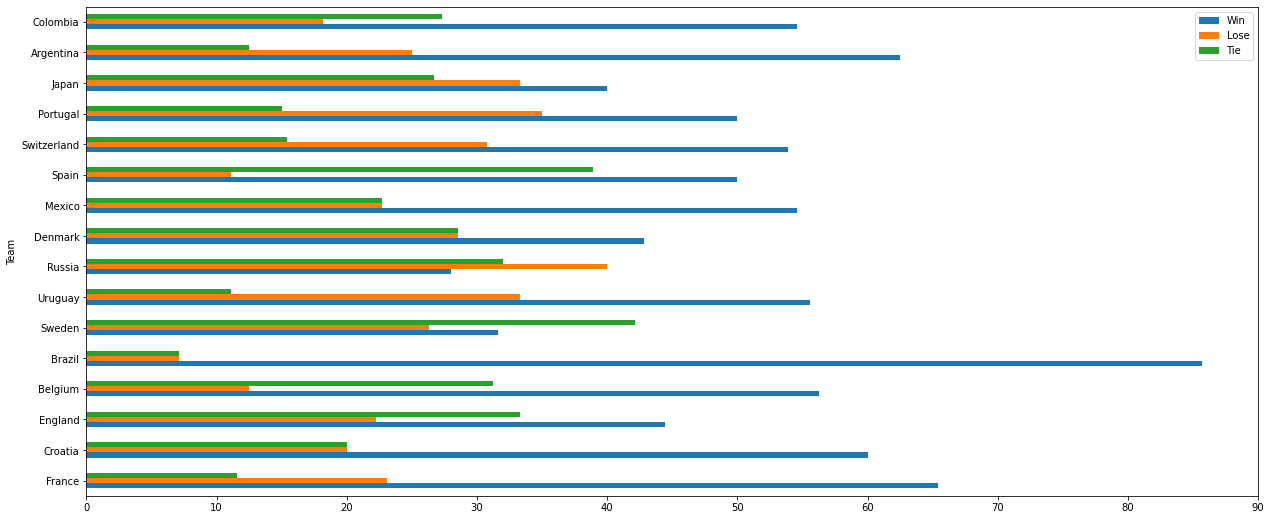

In [140]:
df_total_result_in16 = df_total_result_in16.set_index('Team')
df_total_result_in16.plot.barh(figsize=(21,9));

- Ta có thể thấy trong 16 đội vào vòng trong thì Brazil là đội có tỉ lệ thắng trận giao hữu rất vượt trội (90%). Liệu Brazil có phải là nhà vô địch của WC2018 hay không?
Hay các trận giao hữu thường là với các đội chung khu vực với nhau và có lẽ Brazil quá vượt trội ở khu vực của họ? 

In [141]:
final_match = df_WC_2018.iloc[-1]
if final_match['home_score'] > final_match['away_score']:
    WC2018champion = final_match['home_team']
elif final_match['home_score'] < final_match['away_score']:
    WC2018champion = final_match['away_team']

print(f'The world champion 2018 is {WC2018champion}')

The world champion 2018 is France


- Hmm, khá tiếc khi Brazil không phải là nhà vô địch của WC2018, **có lẽ** họ thường xuyên giao hữu với các đội trong cùng khu vực Nam Mĩ và quá vượt trội.

- Ta sẽ xem thử liệu những đội không vào được vòng trong thì tỉ lệ các trận giao hữu của họ như thế nào?

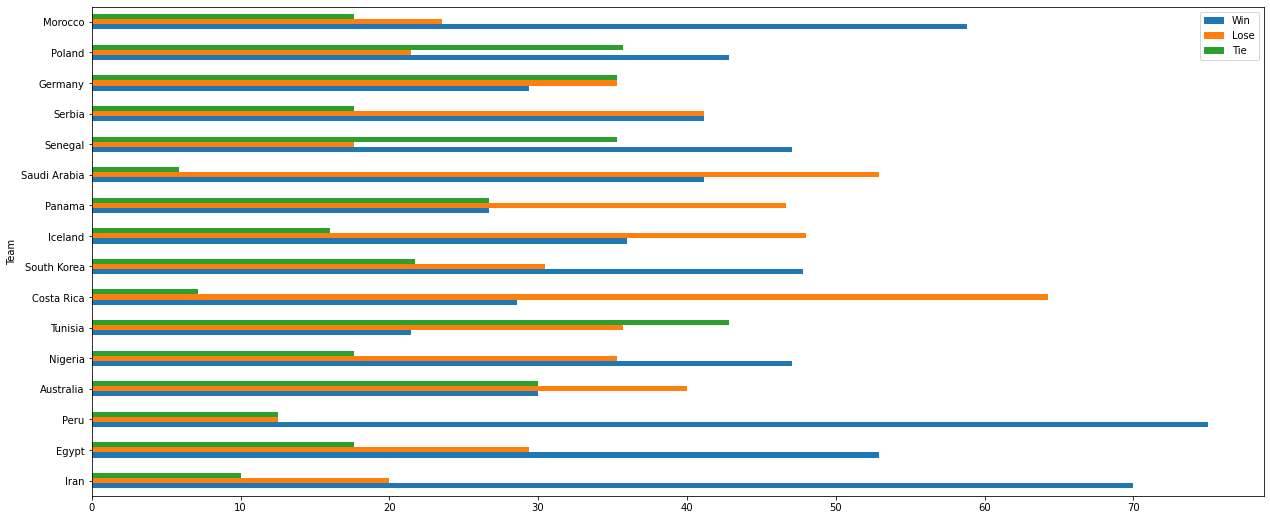

In [142]:
df_total_result_out16 = df_total_result_out16.set_index('Team')
df_total_result_out16.plot.barh(figsize=(21,9));

- Có thể thấy được một cái tên khá bất ngờ trong danh sách các đội bị loại đó là **Đức, nhà vô địch của World Cup 2014**, với tỉ lệ thắng/thua/hòa các trận giao hữu khá tương đương nhau. Có lẽ đây là một kì World Cup để lại rất nhiều tiếc nuối cho người hâm mộ của **cỗ xe tăng Đức**.
- Tỉ lệ thắng các trận giao hữu của Morocco và Iran khá cao, tuy nhiên điều này cũng không thể giúp họ vượt qua vòng bảng.  

- Tiếp theo ta sẽ xem thử kết quả của 4 đội vào bán kết.

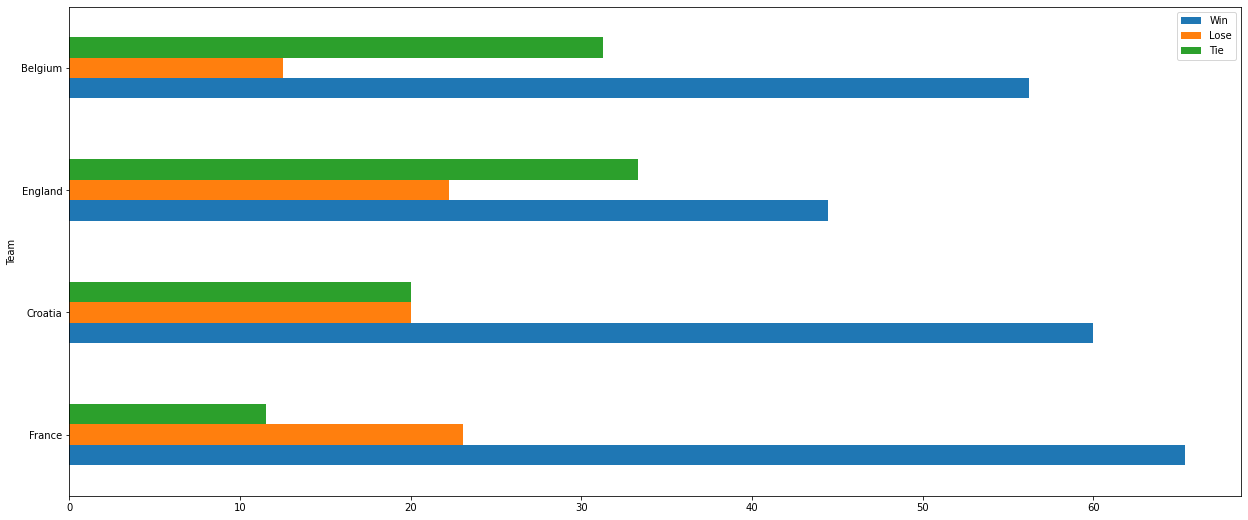

In [143]:
df_total_result_in4 = df_total_result1.loc[df_total_result1['Team'].isin(team_4_list)] 
df_total_result_in4 = df_total_result_in4.set_index('Team')
df_total_result_in4.plot.barh(figsize=(21,9));

- Với việc là 4 đội bóng mạnh nhất thế giới lúc bấy giờ thì có lẽ kết quả giao hữu như vậy là hợp lí với Bỉ, Anh, Croatia và Pháp.

**Nhận xét:** Yếu tố thắng thua các trận giao hữu không phải là yếu tố quyết định cho sự thành công của các đội vì phụ thuộc khá nhiều yếu tố khác nhau (ý đồ chiến thuật, thử nghiệm lứa cầu thủ trẻ, thăm dò đối phương...). Tuy nhiên những trận đấu này lại không hề vô ích. Với mỗi trận giao hữu thì ý đồ của các đội khác nhau ( việc chiến thắng không phải nhiệm vụ tối thượng), việc đá giao hữu cũng có thể tạo tâm lí tự tin, cảm giác hưng phấn cho các tuyển thử. Đồng thời phát hiện và cải thiện ra điểm yếu của đội bóng để chuẩn bị cho một kì **World Cup**, giải đấu bóng đá lớn nhất hành tinh.

## Câu hỏi 2: 
**Trong suốt chiều dài lịch sử của các kì World Cup thì liệu có đội bóng nào đã tham dự tất cả các kì World Cup hay không? Kể từ World Cup 1998,tổng số đội tham dự đã được nâng lên 32 đội ,những khu vực nào là khu vực có thành tích tốt nhất?**

### Số lần tham dự của những đội tuyển đã tham dự World Cup

- Đầu tiên ta sẽ đếm thử có bao nhiêu kì World Cup đã diễn ra?

Lấy ra năm diễn ra của các kì World Cup và lưu vào `year_WC`.

In [153]:
df_WC = df_match[df_match['tournament'] == "FIFA World Cup"]
df_WC = df_WC.drop(['city','country','neutral'],axis=1)
df_WC['year'] = df_WC['date'].dt.year
year_WC = df_WC['year'].unique()
print(f'Số các kì World Cup đã diễn ra: {len(year_WC)}')
print(year_WC)

Số các kì World Cup đã diễn ra: 21
[1930 1934 1938 1950 1954 1958 1962 1966 1970 1974 1978 1982 1986 1990
 1994 1998 2002 2006 2010 2014 2018]


- Đã có 21 kì World Cup đã diễn ra, ta được biết World Cup đầu tiên là vào năm 1930 và cứ 4 năm sẽ diễn ra một lần. Tuy nhiễn giai đoạn 1938-1950 đã thiếu đi mất 3 kì World Cup 1942,1944,1948. Tại sao vậy?

    **=>** Theo lịch sử, thì đây chính là giai đoạn thế chiến thứ II, vì vậy các kì World Cup đã không được diễn ra, khá là đáng tiếc. 

Ta sẽ lấy danh sách các đội tham gia các kì World Cup và lưu vào một **dict** `wc_dict` với **key** là năm diễn ra các kì World Cup và **value** là các đội tham dự.

In [204]:
def get_list_attend_wc(df_WC,time):
    temp = df_WC.loc[df_WC['year'] == time]
    result = temp['home_team'].to_list() + temp['away_team'].to_list()
    result = np.unique(result)
    return result

wc_dict = {}
for i in year_WC:
    wc_dict[i] = get_list_attend_wc(df_WC,i)

- Lưu số lần tham dự của những đội tuyển đã tham dự World Cup vài `total_attend`.

In [233]:
df_wc_attend_team = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in wc_dict.items() ]))
a = df_wc_attend_team[1930]
for i in year_WC:
    if i == 1930:
        continue
    s1 = df_wc_attend_team[i]
    a = a.append(s1)
total_attend = a.value_counts()
total_attend[:10]

Brazil       21
Germany      19
Italy        18
Argentina    17
Mexico       16
France       15
England      15
Spain        15
Uruguay      13
Belgium      13
dtype: int64

- Ta sẽ lấy ra 10 đội tuyển đã tham dự World Cup nhiều nhất.

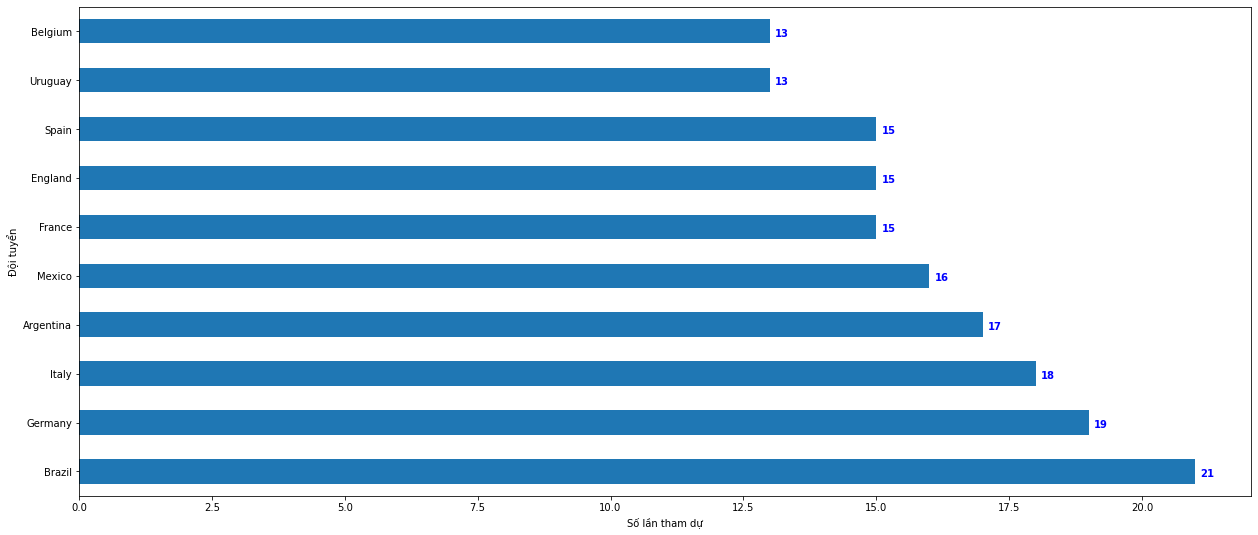

In [247]:
ax = total_attend[:10].plot.barh(figsize=(21,9));
plt.xlabel('Số lần tham dự')
plt.ylabel('Đội tuyển')
for i, v in enumerate(total_attend[:10]):
    ax.text(v + 0.1, i - 0.1, str(v), color='blue', fontweight='bold')
plt.show()

- **Brazil** là đội tuyển duy nhất đã tham dự tất cả kì World Cup (21 lần). Thậm chí họ đã có đến 5 lần vô địch World Cup. Đây chính là đội tuyển quốc gia thành công nhất trên thế giới. Có một câu nói vui là: *" Người Anh sáng tạo ra môn bóng đá, và người Brazil đã hoàn thiện nó"*.

### Kể từ World Cup 1998, đâu là khu vực có thành tính tốt nhất ở World Cup.

Kể từ World Cup 1998, đã có x kì World Cup được tổ chức là : 1998, 2002, 2006, 2010, 2014, 2018.

In [248]:
year_list = [1998,2002,2006,2010,2014,2018]

Để xác định những đội có thành tích tốt nhất, ở mỗi kì World Cup ta chỉ lấy 4 đội đi đến vòng Bán kết.

Hàm `get_best_team_wc` lấy ra list 4 đội có số trận đấu là 7 (vào đến vòng bán kết) của một kì World Cup.

In [303]:
def get_best_team_wc(df_match,time):
    df_wc = df_match.loc[(df_match['date'].dt.year == time) & (df_match['tournament'] == "FIFA World Cup")]

    temp1 = df_wc['home_team'].value_counts().to_frame()
    temp2 = df_wc['away_team'].value_counts().to_frame()

    temp3 = pd.concat([temp1, temp2], axis=1, join='outer')
    temp3['away_team'] = temp3['away_team'].fillna(0)
    temp3['home_team'] = temp3['home_team'].fillna(0)
    temp3['total match'] = temp3['away_team'] + temp3['home_team']

    temp4 = temp3.loc[temp3['total match'] == 7]

    return temp4.index.to_list()

Lưu các đội đã đến bán kết từ World Cup 1998 đến nay vào `df_semifinal_team`.

In [17]:
df_match[['home_score','away_score']]

,Time
Italy,1
Uruguay,1
Belgium,1
England,1
France,3
Brazil,3
Portugal,1
South Korea,1
Netherlands,3
Turkey,1


- Từ bảng trên, ta có thể max của `home_score` và `away_score` là 31 và 21 , có lẽ đây là những trận đấu vô cùng cởi mở từ các đội hoặc là những trận đấu một chiều, trình độ chênh lệch giữ hai đội quá lớn. min là 0.
- Nhìn vào đồ thị, ta hiểu được tại sao mean lại là 1
- Tương tự với `date` như đã tiền xử lý ở trên

a = dict((x,semifinal_team_list.count(x)) for x in set(semifinal_team_list))
df_semifinal_team = pd.DataFrame.from_dict(a,orient='index', columns=['Time'])
df_semifinal_team

Thêm cột **Area** vào `df_semifinal_team` từ *country_continent.csv*

In [18]:
df_continent2 = df_continent.reset_index()[['Country','Continent']].set_index('Country')

df_semifinal_team = pd.merge(df_semifinal_team, df_continent2, left_index=True, right_index=True)
df_semifinal_team

,Time,Continent
Italy,1,Europe
Uruguay,1,South America
Belgium,1,Europe
England,1,Europe
France,3,Europe
Brazil,3,South America
Portugal,1,Europe
South Korea,1,Asia
Netherlands,3,Europe
Turkey,1,Europe


Tiếp theo ta sẽ tính tổng số lần có đội đến từ từng khu vực đi đến vòng bán kết và lưu vào `df_are`.

In [19]:
data = {}
data['Europe'] = df_semifinal_team.loc[df_semifinal_team['Continent'] == 'Europe']['Time'].sum()
data['South America'] = df_semifinal_team.loc[df_semifinal_team['Continent'] == 'South America']['Time'].sum()
data['Asia'] = df_semifinal_team.loc[df_semifinal_team['Continent'] == 'Asia']['Time'].sum()

df_are = pd.DataFrame.from_dict(data,orient='index',columns=['Total Time'])
df_are

,Total Time
Europe,18
South America,5
Asia,1


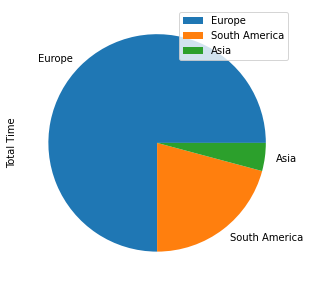

In [363]:
plot = df_are.plot.pie(subplots=True, figsize=(5, 5))

**Nhận xét:** Có vẻ tròng vòng 20 năm đến nay, 6 kì World Cup, thì các đội bóng Châu Âu là khu vực thống trị World Cup (bằng gấp 3 lần Nam Mĩ và Châu Á cộng lại). Điều này vô cùng hợp lí khi các siêu sao hiện nay đa số đều đến từ Châu Âu, và đây cũng là châu lục sở hữu những giải bóng đá vô cùng chất lượng và đáng xem nhất như: UEFA Champions League, UEFA Europa League, Giải bóng đá ngoại hạng Anh, Laliga, Bundesliga(Đức), Ligue 1(Pháp), Seria A(Ý).

## 1. Đội bóng nào vĩ đại nhất thế giới? 

- Bóng đá là môn thể thao có lịch sử lâu đời, xuyên suốt lịch sử bóng đá, qua từng thời kì đêu có những đội thống trị bóng đá toàn thế giới. Vậy thì đội bóng nào mới là đội nổi bật nhất trong tất cả? Trả lời được câu hỏi này ta có thể biết được phần nào mức độ phát triển bóng đá của các nước trên thế giới, lựa chọn đội bóng hâm mộ dựa trên các thông số, cũng như hiểu được tại sao những đội bóng này lại được nhắc nhiều trên truyền thông đến vậy 
- Vậy một đội bóng vĩ đại là đội bóng như thế nào? Theo tôi đó là 
    - Đội bóng ghi được nhiều bàn thắng 
    - Đội bóng giành được nhiều chiến thắng 
    - Đội bóng tham gia nhiều trận đấu 
    
    => Đội có tỉ lệ thắng cao và tỉ lệ ghi bàn cao 

### Tiền xử lí + phân tích dữ liệu để trả lời câu hỏi

#### Trước khi đi sâu vào phân tích, ta sẽ tính kết quả của các trận đấu, đội thắng của các trận đấu 

Dùng `np.select` để có thể lọc ra cột `result` chứa kết quả là Tên đội thắng hoặc `Draw` nếu là hòa. Lưu kết quả vào `df_cau1` để tránh ảnh hưởng đến `df_match`

In [20]:
df_cau1 = df_match.copy()

condition = [(df_cau1['home_score']==df_cau1['away_score']),(df_cau1['home_score']>df_cau1['away_score']),(df_cau1['home_score']<df_cau1['away_score'])]
value=['Draw',df_cau1['home_team'],df_cau1['away_team']]
#phan loai theo dieu kien condition
df_cau1['result']=np.select(condition,value)
df_cau1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


### Quay lại các bước để trả lời câu hỏi

#### Đội bóng nào ghi được nhiều bàn thắng nhất?

##### Bước 1: Tính số bàn thắng khi ở home_team và away_team của các đội bóng

In [21]:
#tim so ban thang khi la home_team
df_home_score = df_cau1.groupby('home_team').sum()[['home_score']]
df_home_score = df_home_score.reset_index()
#tim so ban thang khi la away_team
df_away_score = df_cau1.groupby('away_team').sum()[['away_score']]
df_away_score = df_away_score.reset_index()

##### Bước 2: Gộp 2 dataframe ở trên để tạo ra `df_country_score` chứa kết quả sân nhà và sân khách của các đội bóng

In [22]:
#merge 2 df lại
df_country_score = pd.merge(df_home_score,df_away_score,left_on='home_team',right_on='away_team')
del df_country_score['away_team']
df_country_score.columns = ['country','home_score','away_score']
df_country_score.head()

,country,home_score,away_score
0,Afghanistan,52,70
1,Albania,201,117
2,Algeria,542,210
3,American Samoa,11,11
4,Andorra,33,23


##### Bước 3: tính tổng số bàn thắng của các đội vào cột `total_score`, sau đó sort df theo cột `total_score`

In [23]:
df_country_score['total_score'] = df_country_score['home_score'] +df_country_score['away_score']
df_country_score = df_country_score.sort_values(by=['total_score'],ascending=False)
df_country_score.head()

,country,home_score,away_score,total_score
60,England,1153,1061,2214
27,Brazil,1381,736,2117
73,Germany,1240,860,2100
180,Sweden,1134,873,2007
8,Argentina,1213,625,1838


- Có vẻ như nhờ lợi thế là nơi khởi nguồn của nền bóng đá hiện đại, thời gian diễn ra trận đấu đầu tiên sớm đã giúp cho `England` đứng đầu chỉ số bàn thắng ghi được

#### Đội bóng nào giành được nhiều chiến thắng nhất?

Gom nhóm `df_cau1` theo cột `result` rồi lưu số trận thắng của từng đội vào `df_country_win`

In [24]:
df_country_win = df_cau1.groupby('result').size()
#bo ket qua hoa
df_country_win = df_country_win.drop('Draw')

df_country_win = df_country_win.sort_values(ascending=False)
#chuyen ve df
df_country_win = df_country_win.reset_index()
df_country_win.columns = ['country','win_match']
df_country_win.head(5)

,country,win_match
0,Brazil,622
1,England,576
2,Germany,544
3,Argentina,532
4,Sweden,506


- Là đội bóng có nhiều World Cup nhất nên không bất ngờ nếu Brazil là đội đứng đầu

#### Đội bóng nào tham gia nhiều trận đấu nhất?

##### Tính tổng số trận đấu mà đội bóng tham gia với tư cách là `home_team` và `away_team`  lưu vào `df_country_match`

In [25]:
#tinh tong so tran
df_country_match = df_cau1.groupby('home_team').size() + df_cau1.groupby('away_team').size()
#chuyen ve dataframe
df_country_match = df_country_match.reset_index()
df_country_match.columns = ['country','match_played']
#sort
df_country_match = df_country_match.sort_values(by='match_played',ascending=False)
df_country_match.head()

,country,match_played
180,Sweden,1011
60,England,1005
8,Argentina,986
27,Brazil,966
73,Germany,929


- Khá bất ngờ khi Thụy Điển là nước tham gia nhiều trận đấu nhất

#### Cuối cùng tính tỉ lệ thắng và số bàn thắng trên trận của từng đội tuyển, tìm những đội tuyển tốt nhất

Bước 1: gộp 3 dataframe được tạo ở trên `df_country_score` , `df_country_match`, `df_country_win` lại thành `df_country_stats`

In [26]:
df_country_stats = pd.merge(df_country_score,df_country_win,on='country')
df_country_stats = df_country_stats.merge(df_country_match,on='country')
df_country_stats.head()

,country,home_score,away_score,total_score,win_match,match_played
0,England,1153,1061,2214,576,1005
1,Brazil,1381,736,2117,622,966
2,Germany,1240,860,2100,544,929
3,Sweden,1134,873,2007,506,1011
4,Argentina,1213,625,1838,532,986


Bước 2: Tính tỉ lệ thắng và số bàn trên trận của từng đội tuyển, lưu vào 2 cột `win_rate` và `score_per_game`. Sau đó sắp xếp theo `win_rate` và `score_per_game`

In [27]:
df_country_stats['win_rate'] = (df_country_stats['win_match'] / df_country_stats['match_played']).round(3)
df_country_stats['score_per_game'] = (df_country_stats['total_score'] / df_country_stats['match_played']).round(3)

#bo nhung cot khong can dung den nua
df_country_stats = df_country_stats[['country','total_score','match_played','win_rate','score_per_game']]
#sort
df_country_stats = df_country_stats.sort_values(by=['win_rate','score_per_game'],ascending=False)
df_country_stats.head()

,country,total_score,match_played,win_rate,score_per_game
1,Brazil,2117,966,0.644,2.192
11,Spain,1396,685,0.590,2.038
2,Germany,2100,929,0.586,2.260
0,England,2214,1005,0.573,2.203
37,Iran,947,505,0.558,1.875


- Vẽ correlation plot để có cái nhìn tổng quát về chỉ số các đội tuyển trên thế giới

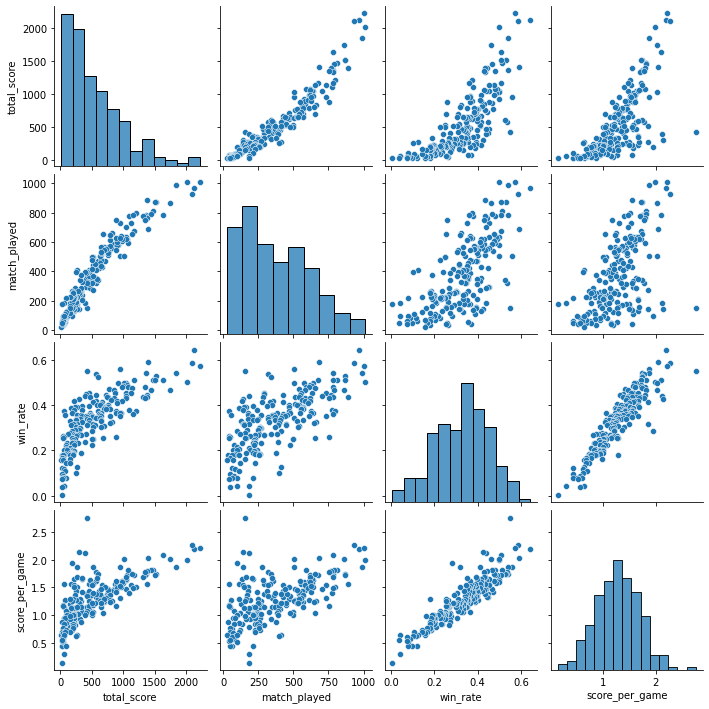

In [28]:
sns.pairplot(df_country_stats);

- Có một số nước có tỉ lệ thắng và số bàn thắng một trận cao nhưng số trận đã đấu ít hơn so với top đầu, có lẽ ta nên xét những nước đã đá trên 800 trận đấu để công bằng hơn.

Bước 3: Xét các nước có số trận trên 800 và tỉ lệ thắng lớn hơn 0.4, lưu vào `df_best_country`

In [29]:
df_best_country = df_country_stats[ (df_country_stats['win_rate'] > 0.4) \
    & (df_country_stats['match_played'] > 800) ]
df_best_country.head()

,country,total_score,match_played,win_rate,score_per_game
1,Brazil,2117,966,0.644,2.192
2,Germany,2100,929,0.586,2.260
0,England,2214,1005,0.573,2.203
4,Argentina,1838,986,0.540,1.864
7,South Korea,1516,870,0.529,1.743


#### Vẽ đồ thị scatter biểu diễn tỉ lệ thắng và số bàn thắng của các đội bóng vĩ đại nhất lịch sử bóng đá

E:\app\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


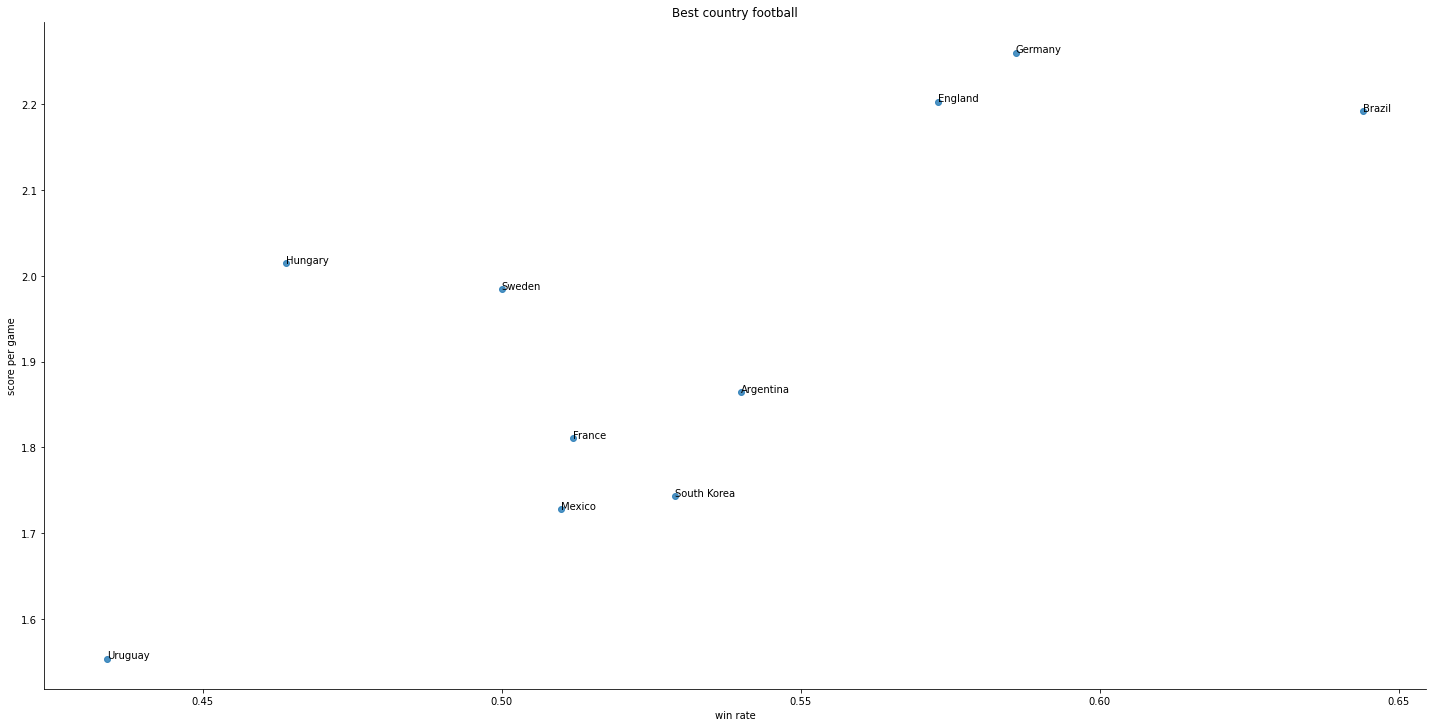

In [30]:
ax = sns.lmplot('win_rate', 'score_per_game',data = df_best_country,\
     fit_reg=False,height= 10,aspect =2 );

#cai dat thong tin bieu do
plt.title('Best country football');
plt.xlabel('win rate');
plt.ylabel('score per game');
#hien thi ten tung diem
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
label_point(df_best_country['win_rate'],df_best_country['score_per_game'],df_best_country['country'],plt.gca())

Như vậy có thể thấy rằng:
- Brazil là nước có tỉ lệ thắng cao nhất, cũng như là top đầu số bàn ghi một trận.
- Đức là nước có số bàn thắng ghi được mỗi trận cao nhất, phù hợp với những người thích coi một trận đấu cống hiến
- Anh là nước có lịch sử bóng đá lâu đời, dành cho người thích về văn hóa bóng đá
- Có thể thấy những nước ở Châu Mỹ và Châu Âu phát triển bóng đá mạnh hơn những nơi còn lại

## 2. Đội bóng nào có số trận thắng trung bình cao nhất từng khu vực.

 - Số trận thắng trung bình là tổng số trận thắng / số nước của khu vực. Việc này để tiện so sánh hơn giữa các khu vực nhỏ và lớn
 - Việc đánh giá các đội bóng theo từng khu vực sẽ cho ra kết quả tốt nhất vì sự đồng đều về chất lượng, thể hình, thể lực của các nước, cũng như là nơi diễn ra nhiều trận đấu nhất nên dễ dàng so sánh hơn.
 - Qua câu hỏi này, chúng ta mong muốn tìm được những đội bóng mạnh nhất theo khu vực của họ, từ đó có thể tìm hiểu thêm về tiêu chuẩn phát triển bóng đá của từng khu vực.
 - Lưu ý: ở đây ta định nghĩa so sánh theo khu vực có nghĩa là cả 2 đội đều đến từ cùng 1 khu vực trong 1 trận đấu

### Tiền xử lý

- Từ `df_continent` ta tạo series `country_continent` có index là tên các đội tuyển và values là tên khu vực của từng đội tuyển

In [31]:
country_continent = df_continent[['Country','Continent']]
country_continent = country_continent.set_index('Country')
country_continent.sample(5)

,Continent
Country,
Myanmar,Asia
Bangladesh,Asia
Iraq,Asia
Costa Rica,"North America, Central America and the Caribbean"
Eswatini,Africa


- Tiếp theo tạo cột `continent` của `df_cau2` ( hay `df_cau1`, dùng lại do cần thêm cột `result`) chứa thông tin khu vực chung của cả 2 đội
- Bỏ các trận có giá trị `NaN` tức là 2 đội không cùng thuộc một khu vực

In [32]:
df_cau2 = df_cau1.copy()
# squeeze() chuyen df ve series
# map de chuyen cac nuoc thanh ten khu vuc
home_continent = df_cau2['home_team'].map(country_continent.squeeze())
away_continent = df_cau2['away_team'].map(country_continent.squeeze())
#chon cac tran dau co khu vuc giong nhau
m = home_continent == away_continent
#tao cot continent tu nhung row o tren
df_cau2.loc[m, 'continent'] = home_continent.loc[m]
#bo cac gia tri None
df_cau2 = df_cau2.dropna()

df_cau2.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,continent
38362,2016-09-04,Malawi,Eswatini,1,0,African Cup of Nations qualification,Blantyre,Malawi,False,Malawi,Africa
30829,2008-10-10,Malaysia,Pakistan,4,1,Friendly,Kuala Lumpur,Malaysia,False,Malaysia,Asia
1933,1936-12-06,Republic of Ireland,Hungary,2,3,Friendly,Dublin,Irish Free State,False,Hungary,Europe
24022,2001-05-06,Maldives,Indonesia,0,2,FIFA World Cup qualification,Malé,Maldives,False,Indonesia,Asia
6795,1968-04-07,Togo,Guinea,1,1,Friendly,Lomé,Togo,False,Draw,Africa


- Loại bỏ kết quả của các trận đấu mà 2 đội không đến cùng 1 khu vực

### Quay lại trả lời câu hỏi

Bước 1: tạo ra 6 dataframe ứng với 6 khu vực, sau đo lưu 6 dataframe này vào `list_df_continent`

In [33]:
name_continent = df_cau2['continent'].unique().tolist()
list_df_continent = []
for i in name_continent:
    df_temp = df_cau2.copy()
    df_temp = df_temp[df_temp['continent'] == i]
    #gan result bang ten doi tuyen voi ten luc dia
    df_temp.loc[df_temp['result'] != 'Draw','result'] = df_temp['result'] + ' ('+ df_temp['continent']+')'
    list_df_continent.append(df_temp)

Bước 2: Sắp xếp lại danh sách các quốc gia có nhiều trận thắng nhất theo từng khu vực bằng cách gom nhóm cột `result`. Chọn đội có nhiều trận thắng nhất rồi lưu vào series `best_country_continent` chứa tên đội là index và values là số trận thắng

In [34]:
#dau tien tao dict de luu gia tri
best_country_continent = {}
for i in range(len(list_df_continent)):
    list_df_continent[i] = list_df_continent[i].groupby('result').size()/len(list_df_continent[i]['home_team'].unique().tolist())
    list_df_continent[i] = list_df_continent[i].drop('Draw')
    list_df_continent[i] = list_df_continent[i].sort_values(ascending=False)
    best_country_continent[list_df_continent[i].index[0]] = list_df_continent[i][0]
#chuyen doi dict sang series
best_country_continent = pd.Series(best_country_continent)

Vẽ biểu đồ cột biểu diễn số trận thắng trung bình của những đội tuyển tốt nhất từng khu vực

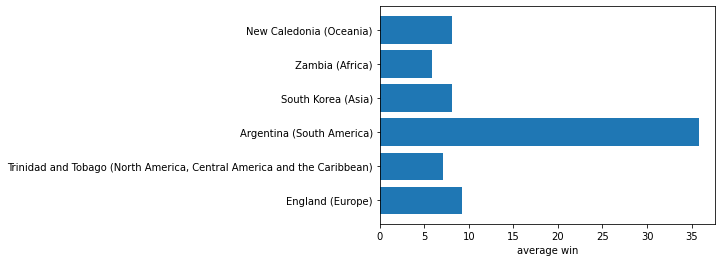

In [35]:
plt.barh(best_country_continent.index,best_country_continent.values);
plt.xlabel('average win');

- Đây là những nước đứng đầu về số trận thắng trung bình theo từng khu vực. Nhìn vào đây có thể ta suy ra được phần nào về sự chênh lệch về trình độ bóng đá của các khu vực.
- Có vẻ như các khu vực khác có sự chênh lệch đều, còn khu vực Nam Mỹ có vẻ như có sự chênh lệch khá lớn giữa các đội. Chênh lệch thấp nhất là khu vực Châu phi
- Vậy tại sao cùng thuộc Nam Mỹ nhưng Brazil là đội bóng vĩ đại nhất lịch sử còn Argentina lại là đội có số trận thắng nhiều nhất? Nguyên nhân là do Argentina bắt đầu tham gia bóng đá FIFA trước Brazil, tương tự các trường hợp khác

## Câu hỏi 3: 
**Từ kì World Cup gần nhất (2018), việc tham gia các trận giao hữu có ảnh hưởng đến đến kết quả tại World Cup của các đội hay không?**

Đầu tiên ta sẽ lấy ra bảng kết quả của World Cup 2018 và lưu vào `df_WC_2018` và lấy ra ngày bắt đầu của World Cup 2018 lưu vào `start_day`.

In [36]:
temp = df_match[df_match['date'].dt.year == 2018]
df_WC_2018 = temp[temp['tournament'] == "FIFA World Cup"]

start_day = df_WC_2018['date'].min()

df_WC_2018.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40021,2018-06-14,Russia,Saudi Arabia,5,0,FIFA World Cup,Moscow,Russia,False
40022,2018-06-15,Egypt,Uruguay,0,1,FIFA World Cup,Ekaterinburg,Russia,True
40023,2018-06-15,Morocco,Iran,0,1,FIFA World Cup,St. Petersburg,Russia,True
40024,2018-06-15,Portugal,Spain,3,3,FIFA World Cup,Sochi,Russia,True
40025,2018-06-16,France,Australia,2,1,FIFA World Cup,Kazan,Russia,True


Loại bỏ những cột không cần thiết như `city, country, neutral`.

In [37]:
df_WC_2018 = df_WC_2018.drop(['city','country','neutral'],axis=1)

Tiếp theo ta sẽ lấy ra tổng số trận thi đấu của 32 đội tham dự World Cup 2018 và các đội tham dư WC2018 lưu vào `team_list`.

In [38]:
temp1 = df_WC_2018['home_team'].value_counts().to_frame()

temp2 = df_WC_2018['away_team'].value_counts().to_frame()

temp3 = pd.concat([temp1, temp2], axis=1, join='outer')

temp3['away_team'] = temp3['away_team'].fillna(0)
temp3['home_team'] = temp3['home_team'].fillna(0)
temp3['total match'] = temp3['away_team'] +temp3['home_team']

temp3 = temp3.sort_values(by=['total match'],ascending=False)
team_list = temp3.index.to_list()
temp3

,home_team,away_team,total match
England,2,5.0,7.0
Belgium,4,3.0,7.0
Croatia,3,4.0,7.0
France,5,2.0,7.0
Russia,5,0.0,5.0
Brazil,4,1.0,5.0
Sweden,3,2.0,5.0
Uruguay,3,2.0,5.0
Spain,1,3.0,4.0
Mexico,1,3.0,4.0


Vì World Cup 2018 được tổ chức ở Nga vì thế số trận làm đội khách của Nga là **0**.

Theo thể thức thi đấu của một kì World Cup ([ta có thể xem tại đây](https://vi.wikipedia.org/wiki/Gi%E1%BA%A3i_v%C3%B4_%C4%91%E1%BB%8Bch_b%C3%B3ng_%C4%91%C3%A1_th%E1%BA%BF_gi%E1%BB%9Bi#Th%E1%BB%83_th%E1%BB%A9c))
- Những đội không vượt qua vòng bảng sẽ thi đấu **3** trận.
- Những đội vượt qua vòng bảng sẽ thi đấu ít nhất **4** trận.
- Những đội vượt qua vòng 1/16 sẽ thi đấu ít nhất **5** trận.
- Những đội vượt qua vòng tứ kết sẽ góp mặt vào vòng bán kết và thi đấu **7** trận.

Ta sẽ lấy ra những đội có thành tích tốt ở WC2018 (tức là đã vượt qua vòng bảng,vòng 16 đôi, vòng tứ kết) và lần lượt lưu vào ``` team_16_list```, ` team_8_list`, ` team_4_list`.

In [39]:
df_16_WC18 = temp3[temp3['total match'] >=4 ]
team_16_list = df_16_WC18.index.to_list()

df_8_WC18 = temp3[temp3['total match'] >=5]
team_8_list = df_8_WC18.index.to_list()

df_4_WC18 = temp3[temp3['total match'] >=7]
team_4_list = df_4_WC18.index.to_list()


- Lấy ra kết quả các trận giao hữu của 32 đội trong khoãng thời gian từ `2015` đến `2018` và lưu vào `df_friendly_match`.

In [40]:
temp4 = df_match.loc[((df_match['date'].dt.year == 2018) | (df_match['date'].dt.year == 2017)
                         | (df_match['date'].dt.year == 2016) | (df_match['date'].dt.year == 2015)) & (df_match['tournament'] == "Friendly") 
                         & (df_match['date'] < start_day)]
df_friendly_match = temp4.loc[(temp4['home_team'].isin(team_list)) | temp4['away_team'].isin(team_list) ]
df_friendly_match.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
36764,2015-01-04,Iran,Iraq,1,0,Friendly,Wollongong,Australia,True
36765,2015-01-04,South Korea,Saudi Arabia,2,0,Friendly,Parramatta,Australia,True
36770,2015-01-09,Senegal,Gabon,1,0,Friendly,Casablanca,Morocco,True
36778,2015-01-11,Nigeria,Ivory Coast,0,1,Friendly,Abu Dhabi,United Arab Emirates,True
36779,2015-01-11,Tunisia,Algeria,1,1,Friendly,Radès,Tunisia,False


- Kết quả số trận thắng, thua, hòa trong các trận giao hữu của 16 đội sẽ được lưu vào `df_total_result`.

In [41]:
df_total_result = pd.DataFrame(columns=['Team','Win', 'Lose', 'Tie'])

- Tạo hàm `getTotalResultofTeam` để lấy ra kết quả tổng số trận thắng, thua, hòa trong số trận giao hữu của một đội và lưu vào một `dict`.

In [42]:
def getTotalResultofTeam(name,df_friendly_match):
    total_result = {'Team':name,
                'Win': 0,
                'Lose': 0,
                'Tie': 0}
    df_team_home = df_friendly_match.loc[(df_friendly_match['home_team'] ==name)][["date","home_team","away_team","home_score","away_score"]]
    df_team_home["goal difference"] = df_team_home["home_score"] - df_team_home["away_score"]
    tempp1 =  df_team_home["goal difference"] 

    df_team_away = df_friendly_match.loc[(df_friendly_match['away_team'] ==name)][["date","home_team","away_team","home_score","away_score"]]
    df_team_away["goal difference"] = df_team_away["away_score"] - df_team_away["home_score"]
    tempp2 =  df_team_away["goal difference"] 

    result = np.append(df_team_home["goal difference"].values,df_team_away["goal difference"].values)
    result
    for i in result:
        if i>0:
            total_result["Win"]+=1
        elif i == 0:
            total_result["Tie"]+=1
        elif i <0:
            total_result["Lose"]+=1
    return total_result

- Hàm `get_df_total_result` để thực hiện việc lưu kết quả giao hữu của 32 đội vào `df_total_result`.

In [43]:
def get_df_total_result(df_total_result, team_list):
    count = 0
    for name in team_list:
        total_result = getTotalResultofTeam(name,df_friendly_match)
        df_total_result = df_total_result.append(total_result,ignore_index=True)
        count+=1
    return df_total_result

In [44]:
df_total_result = get_df_total_result(df_total_result, team_list)
df_total_result['Total Match'] = (df_total_result['Win']+df_total_result['Lose'] + df_total_result['Tie'])
df_total_result.head(5)

,Team,Win,Lose,Tie,Total Match
0,England,8,4,6,18
1,Belgium,9,2,5,16
2,Croatia,9,3,3,15
3,France,17,6,3,26
4,Russia,7,10,8,25


Tiếp theo ta sẽ chuẩn hóa dữ liệu và lưu vào `df_total_result1`.

In [45]:
df_total_result1 = df_total_result.copy()
df_total_result1['Win'] =(df_total_result1['Win']*100) / df_total_result1['Total Match']
df_total_result1['Lose'] =(df_total_result1['Lose']*100) / df_total_result1['Total Match']
df_total_result1['Tie'] =(df_total_result1['Tie']*100) / df_total_result1['Total Match']

df_total_result1.sort_values(by='Win',ascending=False)
df_total_result1 = df_total_result1.drop(['Total Match'],axis=1);

Biểu đồ tỉ lệ về kết quả các trận giao hữu của các đội vượt qua vòng bảng.

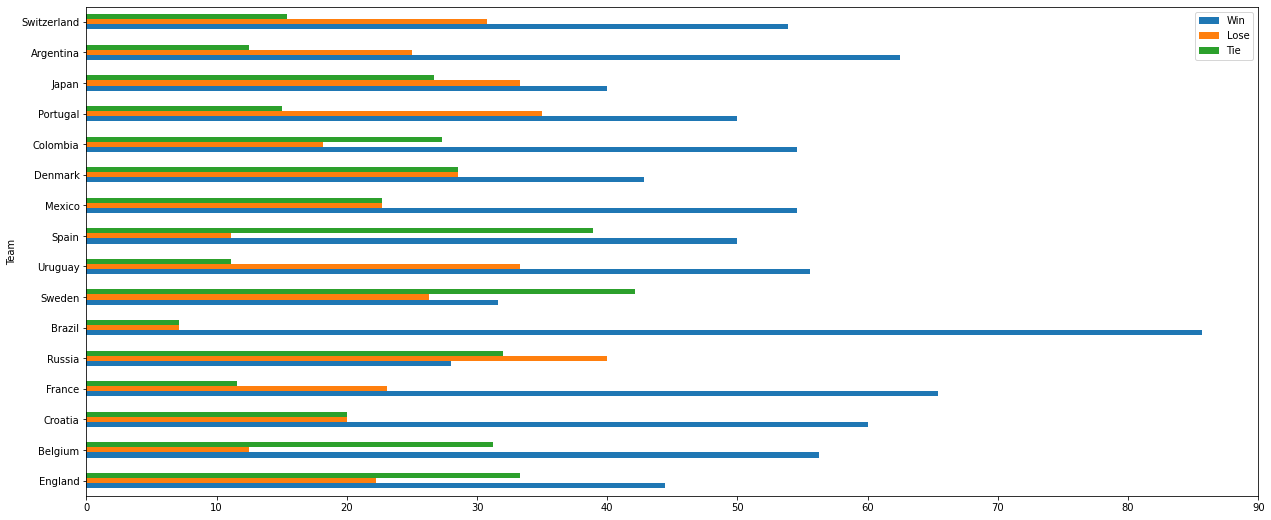

In [46]:
df_total_result_in16 = df_total_result1.loc[df_total_result1['Team'].isin(team_16_list)] 
df_total_result_in16 = df_total_result_in16.set_index('Team')
df_total_result_in16.plot.barh(figsize=(21,9));

- Ta có thể thấy trong 16 đội vào vòng trong thì Brazil là đội có tỉ lệ thắng trận giao hữu rất vượt trội (90%). Liệu Brazil có phải là nhà vô địch của WC2018 hay không?
Hay các trận giao hữu thường là với các đội chung khu vực với nhau và có lẽ Brazil quá vượt trội ở khu vực của họ? 

In [47]:
final_match = df_WC_2018.iloc[-1]
if final_match['home_score'] > final_match['away_score']:
    WC2018champion = final_match['home_team']
elif final_match['home_score'] < final_match['away_score']:
    WC2018champion = final_match['away_team']

print(f'The world champion 2018 is {WC2018champion}')

The world champion 2018 is France


- Hmm, khá tiếc khi Brazil không phải là nhà vô địch của WC2018, **có lẽ** họ thường xuyên giao hữu với các đội trong cùng khu vực Nam Mĩ và quá vượt trội.

- Ta sẽ xem thử liệu những đội không vào được vòng trong thì tỉ lệ các trận giao hữu của họ như thế nào?

Biểu đồ về kết quả các trận giao hữu của các đội không vượt qua vòng bảng.

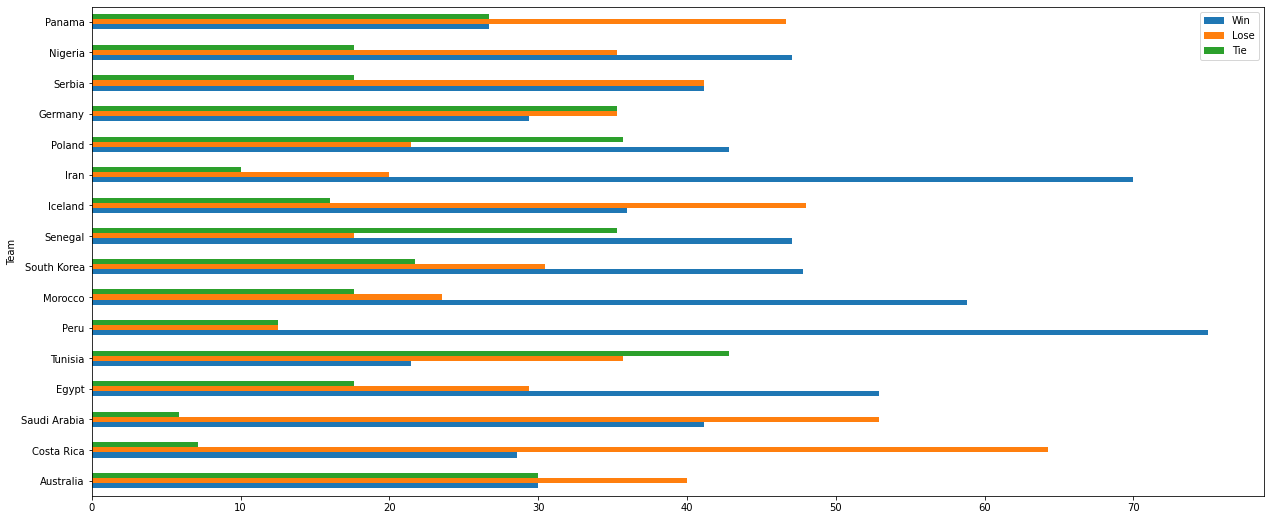

In [48]:
df_total_result_out16 = df_total_result1.loc[~df_total_result1['Team'].isin(team_16_list)] 
df_total_result_out16 = df_total_result_out16.set_index('Team')
df_total_result_out16.plot.barh(figsize=(21,9));

- Có thể thấy được một cái tên khá bất ngờ trong danh sách các đội bị loại đó là **Đức, nhà vô địch của World Cup 2014**, với tỉ lệ thắng/thua/hòa các trận giao hữu khá tương đương nhau. Có lẽ đây là một kì World Cup để lại rất nhiều tiếc nuối cho người hâm mộ của **cỗ xe tăng Đức**.
- Tỉ lệ thắng các trận giao hữu của Morocco và Iran khá cao, tuy nhiên điều này cũng không thể giúp họ vượt qua vòng bảng.  

Tiếp theo ta sẽ xem thử kết quả của 4 đội vào bán kết.

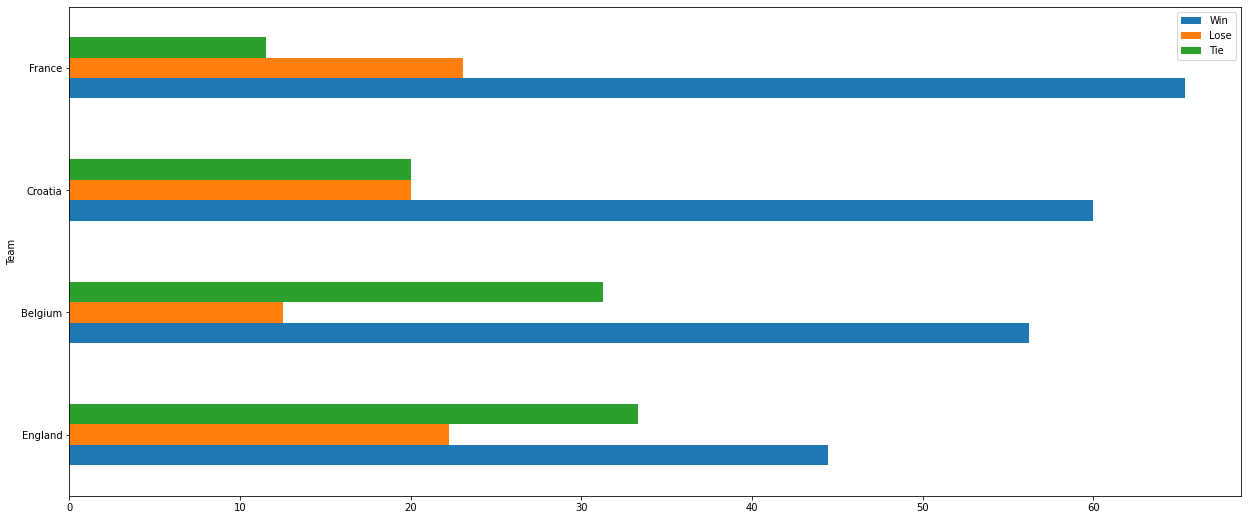

In [49]:
df_total_result_in4 = df_total_result1.loc[df_total_result1['Team'].isin(team_4_list)] 
df_total_result_in4 = df_total_result_in4.set_index('Team')
df_total_result_in4.plot.barh(figsize=(21,9));

- Với việc là 4 đội bóng mạnh nhất thế giới lúc bấy giờ thì có lẽ kết quả giao hữu như vậy là hợp lí với Bỉ, Anh, Croatia và Pháp.

**Nhận xét:** Yếu tố thắng thua các trận giao hữu không phải là yếu tố quyết định cho sự thành công của các đội vì phụ thuộc khá nhiều yếu tố khác nhau (ý đồ chiến thuật, thử nghiệm lứa cầu thủ trẻ, thăm dò đối phương...). Tuy nhiên những trận đấu này lại không hề vô ích. Với mỗi trận giao hữu thì ý đồ của các đội khác nhau ( việc chiến thắng không phải nhiệm vụ tối thượng), việc đá giao hữu cũng có thể tạo tâm lí tự tin, cảm giác hưng phấn cho các tuyển thử. Đồng thời phát hiện và cải thiện ra điểm yếu của đội bóng để chuẩn bị cho một kì **World Cup**, giải đấu bóng đá lớn nhất hành tinh.

## Câu hỏi 4: 
**Trong suốt chiều dài lịch sử của các kì World Cup thì liệu có đội bóng nào đã tham dự tất cả các kì World Cup hay không? Kể từ World Cup 1998,tổng số đội tham dự đã được nâng lên 32 đội ,những khu vực nào là khu vực có thành tích tốt nhất?**

### Số lần tham dự của những đội tuyển đã tham dự World Cup

Đầu tiên ta sẽ đếm thử có bao nhiêu kì World Cup đã diễn ra?

- Lấy ra năm diễn ra của các kì World Cup và lưu vào `year_WC`.

In [50]:
df_WC = df_match[df_match['tournament'] == "FIFA World Cup"]
df_WC = df_WC.drop(['city','country','neutral'],axis=1)
df_WC['year'] = df_WC['date'].dt.year
year_WC = df_WC['year'].unique()
print(f'Số các kì World Cup đã diễn ra: {len(year_WC)}')
print(year_WC)

Số các kì World Cup đã diễn ra: 21
[1930 1934 1938 1950 1954 1958 1962 1966 1970 1974 1978 1982 1986 1990
 1994 1998 2002 2006 2010 2014 2018]


- Đã có 21 kì World Cup đã diễn ra, ta được biết World Cup đầu tiên là vào năm 1930 và cứ 4 năm sẽ diễn ra một lần. Tuy nhiễn giai đoạn 1938-1950 đã thiếu đi mất 3 kì World Cup 1942,1944,1948. Tại sao vậy?

    **=>** Theo lịch sử, thì đây chính là giai đoạn thế chiến thứ II, vì vậy các kì World Cup đã không được diễn ra, khá là đáng tiếc. 

Ta sẽ lấy danh sách các đội tham gia các kì World Cup và lưu vào một **dict** `wc_dict` với **key** là năm diễn ra các kì World Cup và **value** là các đội tham dự.

In [51]:
def get_list_attend_wc(df_WC,time):
    temp = df_WC.loc[df_WC['year'] == time]
    result = temp['home_team'].to_list() + temp['away_team'].to_list()
    result = np.unique(result)
    return result

wc_dict = {}
for i in year_WC:
    wc_dict[i] = get_list_attend_wc(df_WC,i)

- Lưu số lần tham dự của những đội tuyển đã tham dự World Cup vài `total_attend`.

In [52]:
df_wc_attend_team = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in wc_dict.items() ]))
a = df_wc_attend_team[1930]
for i in year_WC:
    if i == 1930:
        continue
    s1 = df_wc_attend_team[i]
    a = a.append(s1)
total_attend = a.value_counts()
total_attend[:10]

Brazil       21
Germany      19
Italy        18
Argentina    17
Mexico       16
England      15
Spain        15
France       15
Belgium      13
Uruguay      13
dtype: int64

- Ta sẽ lấy ra 10 đội tuyển đã tham dự World Cup nhiều nhất.

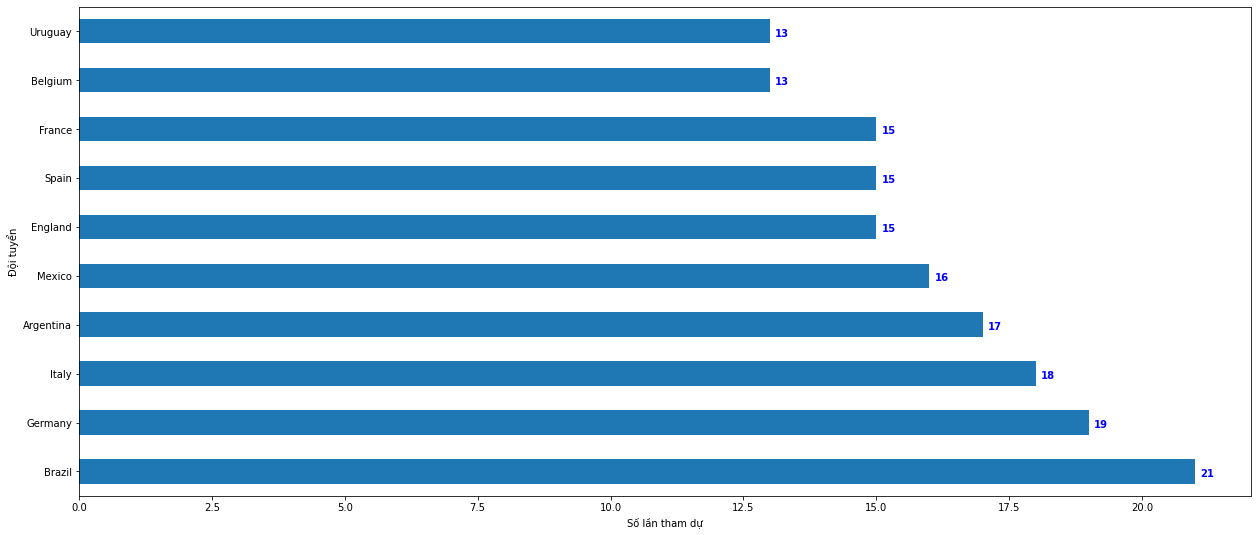

In [53]:
ax = total_attend[:10].plot.barh(figsize=(21,9));
plt.xlabel('Số lần tham dự')
plt.ylabel('Đội tuyển')
for i, v in enumerate(total_attend[:10]):
    ax.text(v + 0.1, i - 0.1, str(v), color='blue', fontweight='bold')
plt.show()

- **Brazil** là đội tuyển duy nhất đã tham dự tất cả kì World Cup (21 lần). Thậm chí họ đã có đến 5 lần vô địch World Cup. Đây chính là đội tuyển quốc gia thành công nhất trên thế giới. Có một câu nói vui là: *" Người Anh sáng tạo ra môn bóng đá, và người Brazil đã hoàn thiện nó"*.

### Kể từ World Cup 1998, đâu là khu vực có thành tính tốt nhất ở World Cup.

Kể từ World Cup 1998, đã có x kì World Cup được tổ chức là : 1998, 2002, 2006, 2010, 2014, 2018.

In [54]:
year_list = [1998,2002,2006,2010,2014,2018]

Để xác định những đội có thành tích tốt nhất, ở mỗi kì World Cup ta chỉ lấy 4 đội đi đến vòng Bán kết.

Hàm `get_best_team_wc` lấy ra list 4 đội có số trận đấu là 7 (vào đến vòng bán kết) của một kì World Cup.

In [55]:
def get_best_team_wc(df_match,time):
    df_wc = df_match.loc[(df_match['date'].dt.year == time) & (df_match['tournament'] == "FIFA World Cup")]

    temp1 = df_wc['home_team'].value_counts().to_frame()
    temp2 = df_wc['away_team'].value_counts().to_frame()

    temp3 = pd.concat([temp1, temp2], axis=1, join='outer')
    temp3['away_team'] = temp3['away_team'].fillna(0)
    temp3['home_team'] = temp3['home_team'].fillna(0)
    temp3['total match'] = temp3['away_team'] + temp3['home_team']

    temp4 = temp3.loc[temp3['total match'] == 7]

    return temp4.index.to_list()

Lưu các đội đã đến bán kết từ World Cup 1998 đến nay vào `df_semifinal_team`.

In [56]:
semifinal_team_list = []
for i in year_list:
    result = get_best_team_wc(df_match,i)
    for j in result:
        semifinal_team_list.append(j)

a = dict((x,semifinal_team_list.count(x)) for x in set(semifinal_team_list))
df_semifinal_team = pd.DataFrame.from_dict(a,orient='index', columns=['Time'])
df_semifinal_team

,Time
France,3
Italy,1
Argentina,1
South Korea,1
Turkey,1
Uruguay,1
Croatia,2
Netherlands,3
Spain,1
Belgium,1


Thêm cột **Area** vào `df_semifinal_team` từ *country_continent.csv*

In [57]:
df_continent2 = df_continent.reset_index()[['Country','Continent']].set_index('Country')

df_semifinal_team = pd.merge(df_semifinal_team, df_continent2, left_index=True, right_index=True)
df_semifinal_team

,Time,Continent
France,3,Europe
Italy,1,Europe
Argentina,1,South America
South Korea,1,Asia
Turkey,1,Europe
Uruguay,1,South America
Croatia,2,Europe
Netherlands,3,Europe
Spain,1,Europe
Belgium,1,Europe


Tiếp theo ta sẽ tính tổng số lần có đội đến từ từng khu vực đi đến vòng bán kết và lưu vào `df_are`.

In [58]:
area = df_semifinal_team['Continent'].value_counts().keys()
print(f'Những khu vực góp mặt vào vòng bán kết là: {[*area]}')

Những khu vực góp mặt vào vòng bán kết là: ['Europe', 'South America', 'Asia']


In [59]:
data = {}
data['Europe'] = df_semifinal_team.loc[df_semifinal_team['Continent'] == 'Europe']['Time'].sum()
data['South America'] = df_semifinal_team.loc[df_semifinal_team['Continent'] == 'South America']['Time'].sum()
data['Asia'] = df_semifinal_team.loc[df_semifinal_team['Continent'] == 'Asia']['Time'].sum()

df_are = pd.DataFrame.from_dict(data,orient='index',columns=['Total Time'])
df_are

,Total Time
Europe,18
South America,5
Asia,1


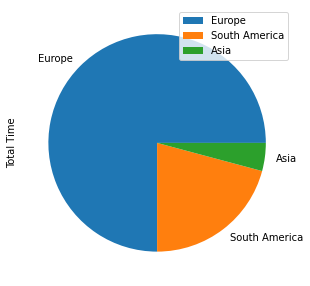

In [60]:
plot = df_are.plot.pie(subplots=True, figsize=(5, 5))

**Nhận xét:** Có vẻ tròng vòng 20 năm đến nay, 6 kì World Cup, thì các đội bóng Châu Âu là khu vực thống trị World Cup (bằng gấp 3 lần Nam Mĩ và Châu Á cộng lại). Điều này vô cùng hợp lí khi các siêu sao hiện nay đa số đều đến từ Châu Âu, và đây cũng là châu lục sở hữu những giải bóng đá vô cùng chất lượng và đáng xem nhất như: UEFA Champions League, UEFA Europa League, Giải bóng đá ngoại hạng Anh, Laliga, Bundesliga(Đức), Ligue 1(Pháp), Seria A(Ý).

---

# Nhìn lại quá trình làm đồ án

### Học được những gì từ đồ án

 #### Trường Dương:

- Cách sử dụng git, biết cách merge. Và đặc biệt đối với file notebook nếu output là `df.sample` thì mỗi lần merge phải xử lý conflict cho phần này, nên phải chấp nhận sửa để người coi không cần chạy code cũng thấy được output.
- Cách kiếm data, tự tìm data và thu thập theo yêu cầu nếu data kiếm được chưa có file `"country-continent.csv"`
- Thành thạo hơn trong việc merge các dataframe
- correlation plot
- biết thêm về np.select để tạo ra cột mới theo điều kiện trong một dataframe
- apply không phải là cách giải quyết tốt nhất nếu truy vấn theo từng dòng của dataframe. tìm tất cả mọi cách để thao tác với numpy (Câu 2 tiền xử lý, thay vì dùng apply thì nên so sánh 2 numpy array cho tốc độ xử lý nhanh hơn 26s vs 0.1s)
- Data là vô hạn, tránh việc sử dụng quá nhiều data có nhiều thuộc tính mà không cần dùng đến để xử lý để có thể gây ra tình trạng rối loạn.

#### Dũng:


Qua đồ án này em đã học được:

- Kĩ năng sử dụng Git, merge git.
- Tổ chức notebook.
- Hiểu rõ hơn quy trình về khoa học dữ liệu.

### Những khó khăn khi thực hiện đồ án

#### Trường Dương:

- Khá khó khăn trong việc mới đầu dùng github, clone về sai nhánh origin nên bị lỗi không merge lại được, phải tạo lại nhánh mới
- File `"country-continent.csv"` không có trên mạng nên phải tự lên Wiki để copy data về xử lý, Thêm nữa phải để ý đến dữ liệu có đúng không như bài này đang làm dữ liệu FIFA nhưng kiếm data các quốc gia theo dữ liệu ISO thì sẽ không thực hiện được
- Xử lý dataframe nếu dùng apply thì sẽ chạy khá lâu, nên phải tìm cách giải quyết bằng numpy
- Phân bố thời gian không hợp lý nên quá trình thực hiện không được như mong muốn

#### Dũng:

- Khó khăn trong việc lựa chọn chủ đề, dataset phù hợp với cả hai.
- Việc merge các branch lại với nhau.
- Suy nghĩ đặt câu hỏi nào để không bị quá đơn giản (em cũng sợ câu hỏi em đã đặt cũng bị đơn giản) và có thể trả lời được bằng dataset.

### Nếu có thời gian sẽ làm thêm những gì?

- Xóa các kết quả trước khi diễn ra Euro 2020, lấy data danh sách các đội tuyển tham gia Euro. Từ những dữ liệu trong quá khứ, dự đoán nhà vô địch của giải dựa trên kết quả đối đầu của các đội bóng từ năm 2010 trở lại đây.

---

# Tài liệu tham khảo

- [1] Các file notebook demo của thầy Kiên.
- [2] [pandas documentation](https://pandas.pydata.org/docs/)
- [3] [numpy documentation](https://numpy.org/doc/stable/user/index.html#user)
- [4] Video hướng dẫn numpy, pandas của thầy Kiên trong quá trình học
- [5] [kaggle](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017/code) nơi cung cấp data cũng như, những câu hỏi gợi ý của tác giả
- [6] [stackoverflow](https://stackoverflow.com/) giải quyết khó khăn về xử lý các hàm của pandas và numpy

---